<img src="img/decisionmaking.png" width="400">

<p style="font-size:35px">ELEC-E7890 - User Research<br></p>
<p style="font-size:30px">Lecture 4 - Data Visualization</p>

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Learning objectives</h2>
    
Learn by a series of examples good practices for data visualization, what allows to transmit the *right* message *efficiently*.
</div>

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
</div>

<div class="alert alert-block alert-info">
 </div>

#### Setup Python environment <a class="tocSkip"></a>

In [246]:
# Import the libraries
import pandas as pd
import numpy as np
import math

import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

import scipy.stats as stats

import gzip

%config InlineBackend.figure_format='retina' # For not burning your eyes
sns.set_theme(style="white")
np.set_printoptions(threshold=8) # Don't print to much elements when printing arrays 

# Data visualization: Why?

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
 **A series of numbers is poorly informative in itself**, as it is difficult to interpret.
</div>

Case adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>),
itself adapted from 
    <a href="https://archive.nytimes.com/www.nytimes.com/imagepages/2007/07/29/health/29cancer.graph.web.html">The New York Times</a>.

In [26]:
diseases   = ["Kidney Cancer", "Bladder Cancer", "Esophageal Cancer",
              "Ovarian Cancer", "Liver Cancer", "Non-Hodgkin's\nlymphoma",
              "Leukemia", "Prostate Cancer", "Pancreatic Cancer",
              "Breast Cancer", "Colorectal Cancer", "Lung Cancer"]
men_deaths = [10000, 12000, 13000, 0, 14000, 12000,
              16000, 25000, 20000, 500, 25000, 80000]
men_cases = [30000, 50000, 13000, 0, 16000, 30000,
             25000, 220000, 22000, 600, 55000, 115000]
women_deaths = [6000, 5500, 5000, 20000, 9000, 12000,
                13000, 0, 19000, 40000, 30000, 70000]
women_cases = [20000, 18000, 5000, 25000, 9000, 29000,
               24000, 0, 21000, 160000, 55000, 97000]

df = pd.DataFrame(dict(
    diseases=diseases, men_deaths=men_deaths, men_cases=men_cases,
    women_deaths=women_deaths, women_cases=women_cases))
df

diseases  men_deaths  men_cases  women_deaths  women_cases
0             Kidney Cancer       10000      30000          6000        20000
1            Bladder Cancer       12000      50000          5500        18000
2         Esophageal Cancer       13000      13000          5000         5000
3            Ovarian Cancer           0          0         20000        25000
4              Liver Cancer       14000      16000          9000         9000
5   Non-Hodgkin's\nlymphoma       12000      30000         12000        29000
6                  Leukemia       16000      25000         13000        24000
7           Prostate Cancer       25000     220000             0            0
8         Pancreatic Cancer       20000      22000         19000        21000
9             Breast Cancer         500        600         40000       160000
10        Colorectal Cancer       25000      55000         30000        55000
11              Lung Cancer       80000     115000         70000        97000

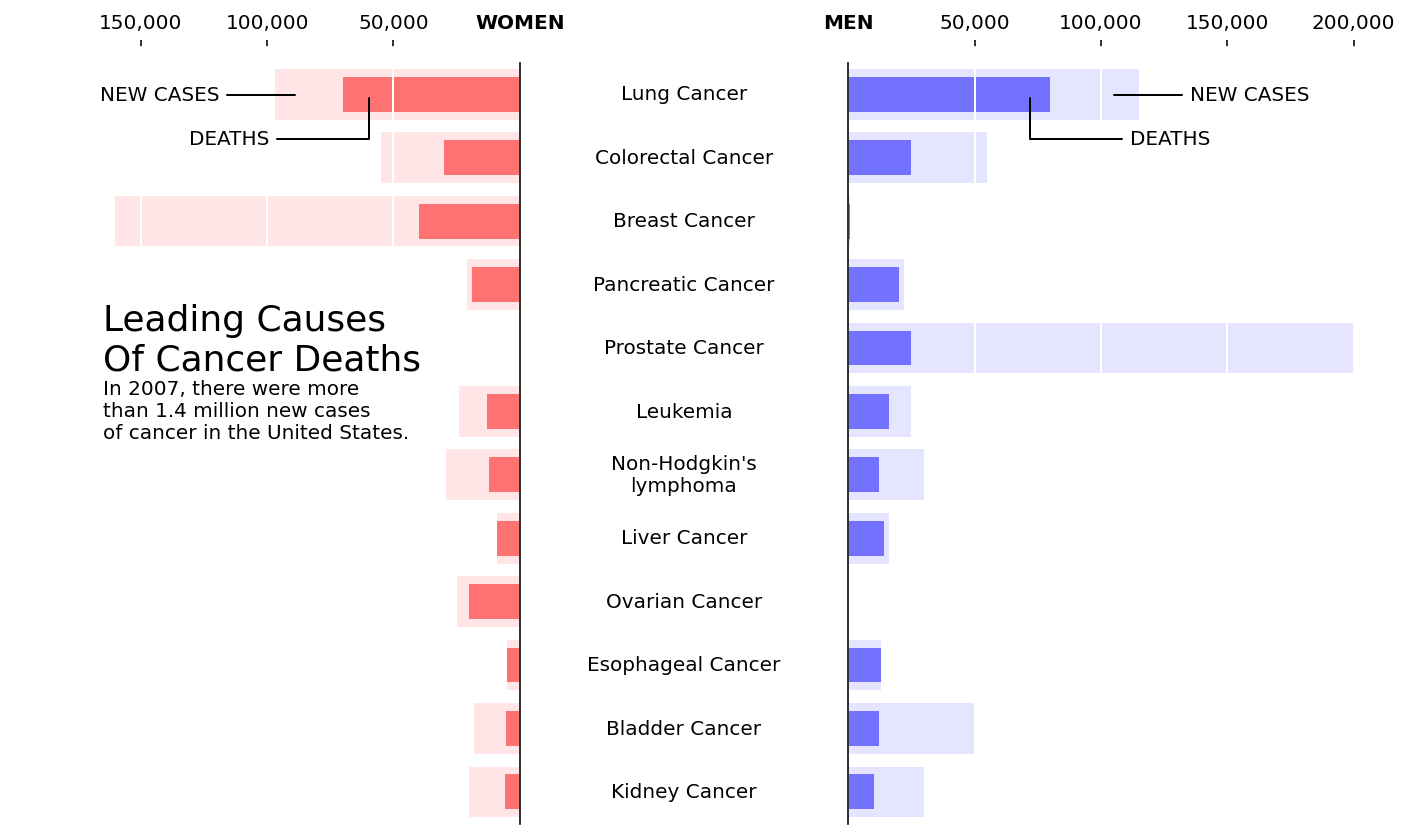

In [30]:
# Reset default settings
sns.reset_orig()

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure.subplot', wspace=.65)
matplotlib.rc('grid', color='white')
matplotlib.rc('grid', linewidth=1)

# Make figure background the same colors as axes
fig = plt.figure(figsize=(12,7), facecolor='white')

# ---WOMEN data ---
axes_left  = plt.subplot(121)

# Keep only top and right spines
axes_left.spines['left'].set_color('none')
axes_left.spines['right'].set_zorder(10)
axes_left.spines['bottom'].set_color('none')
axes_left.xaxis.set_ticks_position('top')
axes_left.yaxis.set_ticks_position('right')
axes_left.spines['top'].set_position(('data',len(diseases)+.25))
axes_left.spines['top'].set_color('w')

# Set axes limits
plt.xlim(200000,0)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([150000, 100000, 50000, 0],
           ['150,000', '100,000', '50,000', 'WOMEN'])
axes_left.get_xticklabels()[-1].set_weight('bold')
axes_left.get_xticklines()[-1].set_markeredgewidth(0)
for label in axes_left.get_xticklabels():
    label.set_fontsize(10)
plt.yticks([])



# Plot data
for i in range(len(women_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = women_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.1)
    axes_left.add_patch(p)
    # New cases
    value = women_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.5)
    axes_left.add_patch(p)

# Add a grid
axes_left.grid()

plt.text(165000,8.2,"Leading Causes\nOf Cancer Deaths", fontsize=18,va="top")
plt.text(165000,7,"""In 2007, there were more\n"""
                  """than 1.4 million new cases\n"""
                  """of cancer in the United States.""", va="top", fontsize=10)

# --- MEN data ---
axes_right = plt.subplot(122, sharey=axes_left)

# Keep only top and left spines
axes_right.spines['right'].set_color('none')
axes_right.spines['left'].set_zorder(10)
axes_right.spines['bottom'].set_color('none')
axes_right.xaxis.set_ticks_position('top')
axes_right.yaxis.set_ticks_position('left')
axes_right.spines['top'].set_position(('data',len(diseases)+.25))
axes_right.spines['top'].set_color('w')


# Set axes limits
plt.xlim(0,200000)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([0, 50000, 100000, 150000, 200000],
           ['MEN', '50,000', '100,000', '150,000', '200,000'])
axes_right.get_xticklabels()[0].set_weight('bold')
for label in axes_right.get_xticklabels():
    label.set_fontsize(10)
axes_right.get_xticklines()[1].set_markeredgewidth(0)
plt.yticks([])

# Plot data
for i in range(len(men_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = men_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.1)
    axes_right.add_patch(p)
    # New cases
    value = men_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.5)
    axes_right.add_patch(p)

# Add a grid
axes_right.grid()

# Y axis labels
# We want them to be exactly in the middle of the two y spines
# and it requires some computations
for i in range(len(diseases)):
    x1,y1 = axes_left.transData.transform_point( (0,i+.5))
    x2,y2 = axes_right.transData.transform_point((0,i+.5))
    x,y = fig.transFigure.inverted().transform_point( ((x1+x2)/2,y1) )
    plt.text(x, y, diseases[i], transform=fig.transFigure, fontsize=10,
             horizontalalignment='center', verticalalignment='center')


# Devil hides in the details...
arrowprops = dict(arrowstyle="-",
                  connectionstyle="angle,angleA=0,angleB=90,rad=0")
x = women_cases[-1]
axes_left.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = women_deaths[-1]
axes_left.annotate('DEATHS', xy=(.85*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-50, -25), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_cases[-1]
axes_right.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_deaths[-1]
axes_right.annotate('DEATHS', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+50, -25), textcoords='offset points',
                   arrowprops=arrowprops)


# Done
plt.savefig('figure-1.pdf')
plt.show()

Compare with just a view on the table:

In [32]:
df

diseases  men_deaths  men_cases  women_deaths  women_cases
0             Kidney Cancer       10000      30000          6000        20000
1            Bladder Cancer       12000      50000          5500        18000
2         Esophageal Cancer       13000      13000          5000         5000
3            Ovarian Cancer           0          0         20000        25000
4              Liver Cancer       14000      16000          9000         9000
5   Non-Hodgkin's\nlymphoma       12000      30000         12000        29000
6                  Leukemia       16000      25000         13000        24000
7           Prostate Cancer       25000     220000             0            0
8         Pancreatic Cancer       20000      22000         19000        21000
9             Breast Cancer         500        600         40000       160000
10        Colorectal Cancer       25000      55000         30000        55000
11              Lung Cancer       80000     115000         70000        97000

# Transmit the right message

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
Do NOT **mislead** your reader/viewer (or even yourself)!
</div>

## Do NOT burn steps

<div class="alert alert-block alert-info">

Always visualize (as much as possible) **individual observations first**. 
</div>

### Remember the dinosaur

#### Dataset 1 <a class="tocSkip"></a>

Let's load the data from `circle-data.csv`

##### Load data <a class="tocSkip"></a>

In [3]:
# Load the data
df = pd.read_csv(
    os.path.join("data", "circle-data.csv"),
    index_col=[0])

# Print the top of the file
df

x          y
0    53.500480  82.351329
1    50.629577  84.715953
2    49.932717  79.284252
3    48.788095  81.244959
4    49.496214  78.992123
..         ...        ...
137  39.580304  21.216219
138  85.303704  41.078480
139  51.310546  84.395317
140  50.594653  81.292113
141  48.743542  82.405670

[142 rows x 2 columns]

You could be tempted to begin to compute descriptive statistics such as mean instead of looking to your data...

In [4]:
# For both variables
for var in "x", "y":
    
    # Compute the mean and variance and print the result showing only 2 digits after the comma
    print(f"Mean '{var}': {np.mean(df[var]):.2f} +/- {np.std(df[var]):.2f} STD")

Mean 'x': 54.27 +/- 16.70 STD
Mean 'y': 47.83 +/- 26.84 STD


And still without looking at the raw data, let's do a barplot:

##### Visualize with a simple bareplot <a class="tocSkip"></a>

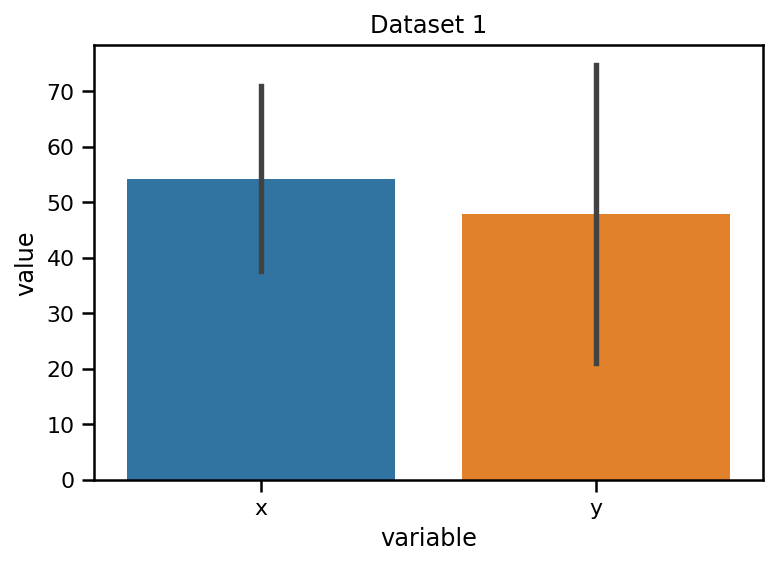

In [5]:
# Let's flip the dataframe (inverse row and columns)
df_flipped = df.melt()
# Do a barplot
sns.barplot(x="variable", y="value", data=df_flipped, ci="sd")
plt.title("Dataset 1")
plt.show()

#### Dataset 2 <a class="tocSkip"></a>

Let's consider a second dataset...

Let's load the data from `dino-data.csv`

##### Load data <a class="tocSkip"></a>

In [6]:
# Load the data
df_other = pd.read_csv(
    os.path.join("data", "dino-data.csv"),
    index_col=[0])

# Look at the top of the file
df_other

x          y
0    55.384600  97.179500
1    51.538500  96.025600
2    46.153800  94.487200
3    42.820500  91.410300
4    40.769200  88.333300
..         ...        ...
137  39.487200  25.384600
138  91.282100  41.538500
139  50.000000  95.769200
140  47.948700  95.000000
141  44.168231  92.657053

[142 rows x 2 columns]

In [7]:
# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the original dataset
    print(f"Dataset 1 - Mean '{var}': {np.mean(df[var]):.1f} +/- {np.std(df[var]):.2f} STD")
print()

# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the second dataset
    print(f"Dataset 2 - Mean '{var}': {np.mean(df_other[var]):.1f} +/- {np.std(df_other[var]):.2f} STD")

Dataset 1 - Mean 'x': 54.3 +/- 16.70 STD
Dataset 1 - Mean 'y': 47.8 +/- 26.84 STD

Dataset 2 - Mean 'x': 54.3 +/- 16.71 STD
Dataset 2 - Mean 'y': 47.8 +/- 26.84 STD


##### Visualize with a simple bareplot <a class="tocSkip"></a>

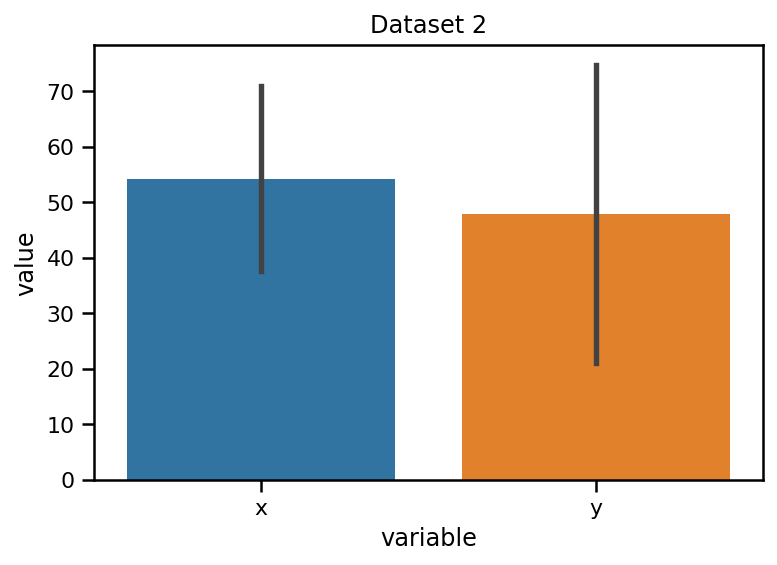

In [8]:
# Do a barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ci="sd")
plt.title("Dataset 2")
plt.show()

#### Compare by looking at the raw data <a class="tocSkip"></a>

They look quite alike, isn't it?

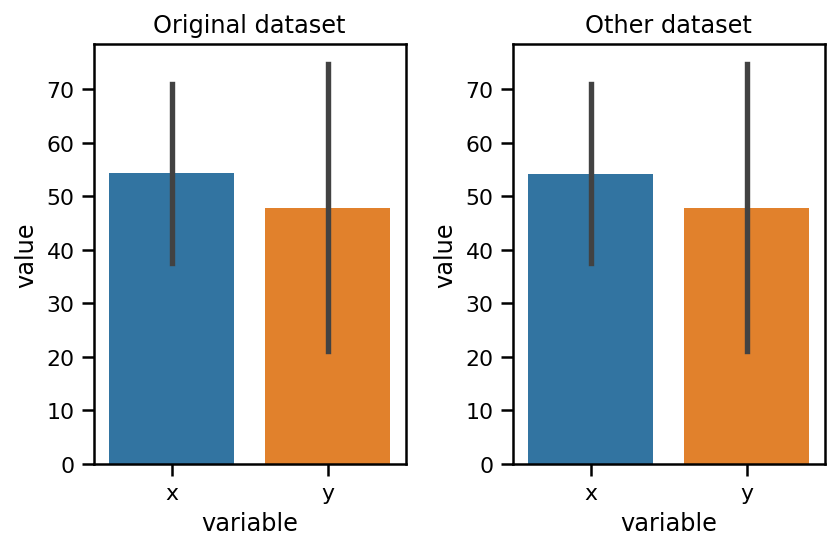

In [9]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2)

# Dot the left barplot
sns.barplot(x="variable", y="value", data=df.melt(), ax=axes[0], ci="sd")
# Set the title
axes[0].set_title("Original dataset")

# Do the right barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ax=axes[1], ci="sd")
# Set the title
axes[1].set_title("Other dataset")

plt.tight_layout()
plt.show()

However...

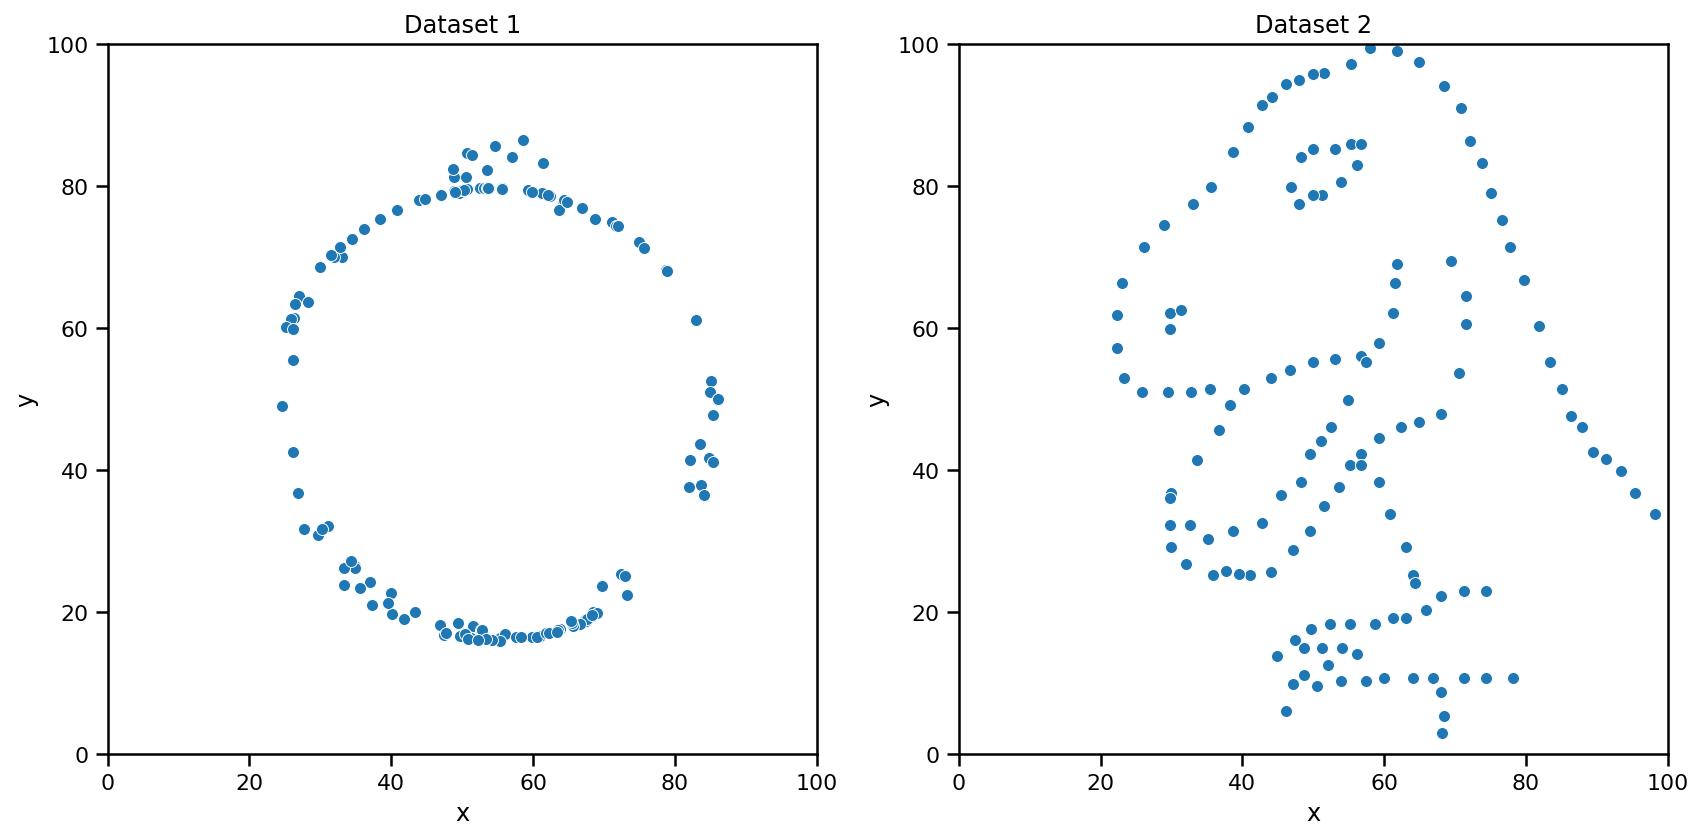

In [10]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 9))


# For both dataset
for i, (label, data) in enumerate((("Dataset 1", df), ("Dataset 2", df_other))):
    
    # Do a scatter plot
    ax = axes[i]
    sns.scatterplot(x="x", y="y", data=data, ax=ax)
    
    # Set the title
    ax.set_title(label)
    
    # Set the limits of the axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # Make it look square
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

> The descriptive statistics are (almost identical) but the distributions are very different. **Look at your raw data first!**

A few more like this:

<img src="img/same_stats_fig5.png" width="700">

<img src="img/same_stats_fig6.png" width="600">

*Note: you can find a lot of astonishing examples in [Matejka, J., & Fitzmaurice, G. (2017, May). Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing. In Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems (pp. 1290-1294)](https://www.autodeskresearch.com/publications/samestats).*

## Adapt the type of figure to the type of comparison/relation you aim to show

<div class="alert alert-block alert-info">

Choose a <b> representation </b>  adapted to the type of your data: <b> misrepresentations</b> leads to <b>misinterpreations</b>
</div>

### (Bad) Example: Creating bins and using barplot for showing relation between two variables

#### Remember the growth-debt example

**Why is it important?** Let's take an example...

#### Example <a class="tocSkip"></a>

In [228]:
# Import the data
df = pd.read_csv(os.path.join("data", "rr.csv"))

# Plot the top of the file
df

Country  Year        Debt    Growth
0     Australia  1946  190.419080 -3.557951
1     Australia  1947  177.321371  2.459475
2     Australia  1948  148.929811  6.437534
3     Australia  1949  125.828699  6.611994
4     Australia  1950  109.809398  6.920201
...         ...   ...         ...       ...
1170         US  2005   62.766724  3.054518
1171         US  2006   63.489973  2.672807
1172         US  2007   63.985488  2.141613
1173         US  2008   74.091061  0.438166
1174         US  2009   83.482835 -2.730170

[1175 rows x 4 columns]

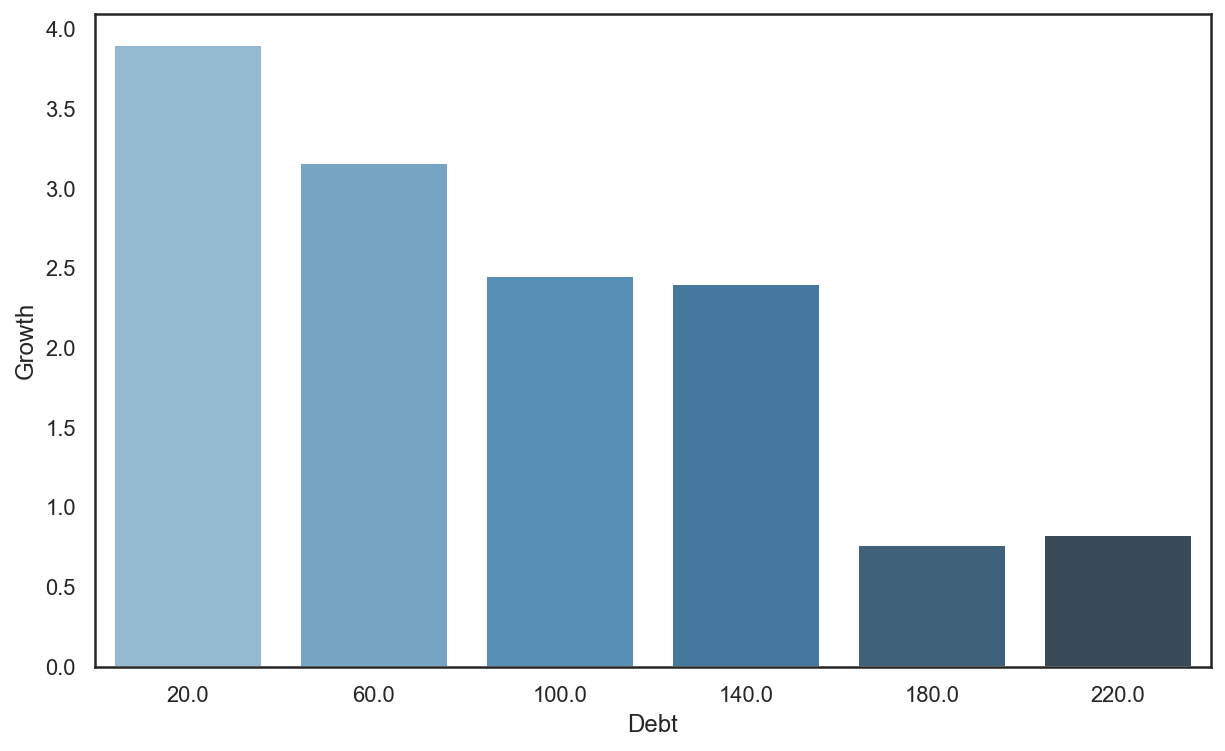

In [229]:
# Create bins
df['DebtBin'] = pd.cut(df.Debt, bins=range(0, 250, 40), include_lowest=False)

# Compute the mean of each bins
y = df.groupby('DebtBin').Growth.mean()

# For the x-axis, compute the middle value of each bin
x = [i.left + (i.right - i.left)/2 for i in y.index.values]

# Create the barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y.values, palette="Blues_d", ax=ax)

# Set the axis labels
ax.set_xlabel("Debt")
ax.set_ylabel("Growth");

However, here is what the raw data look like:

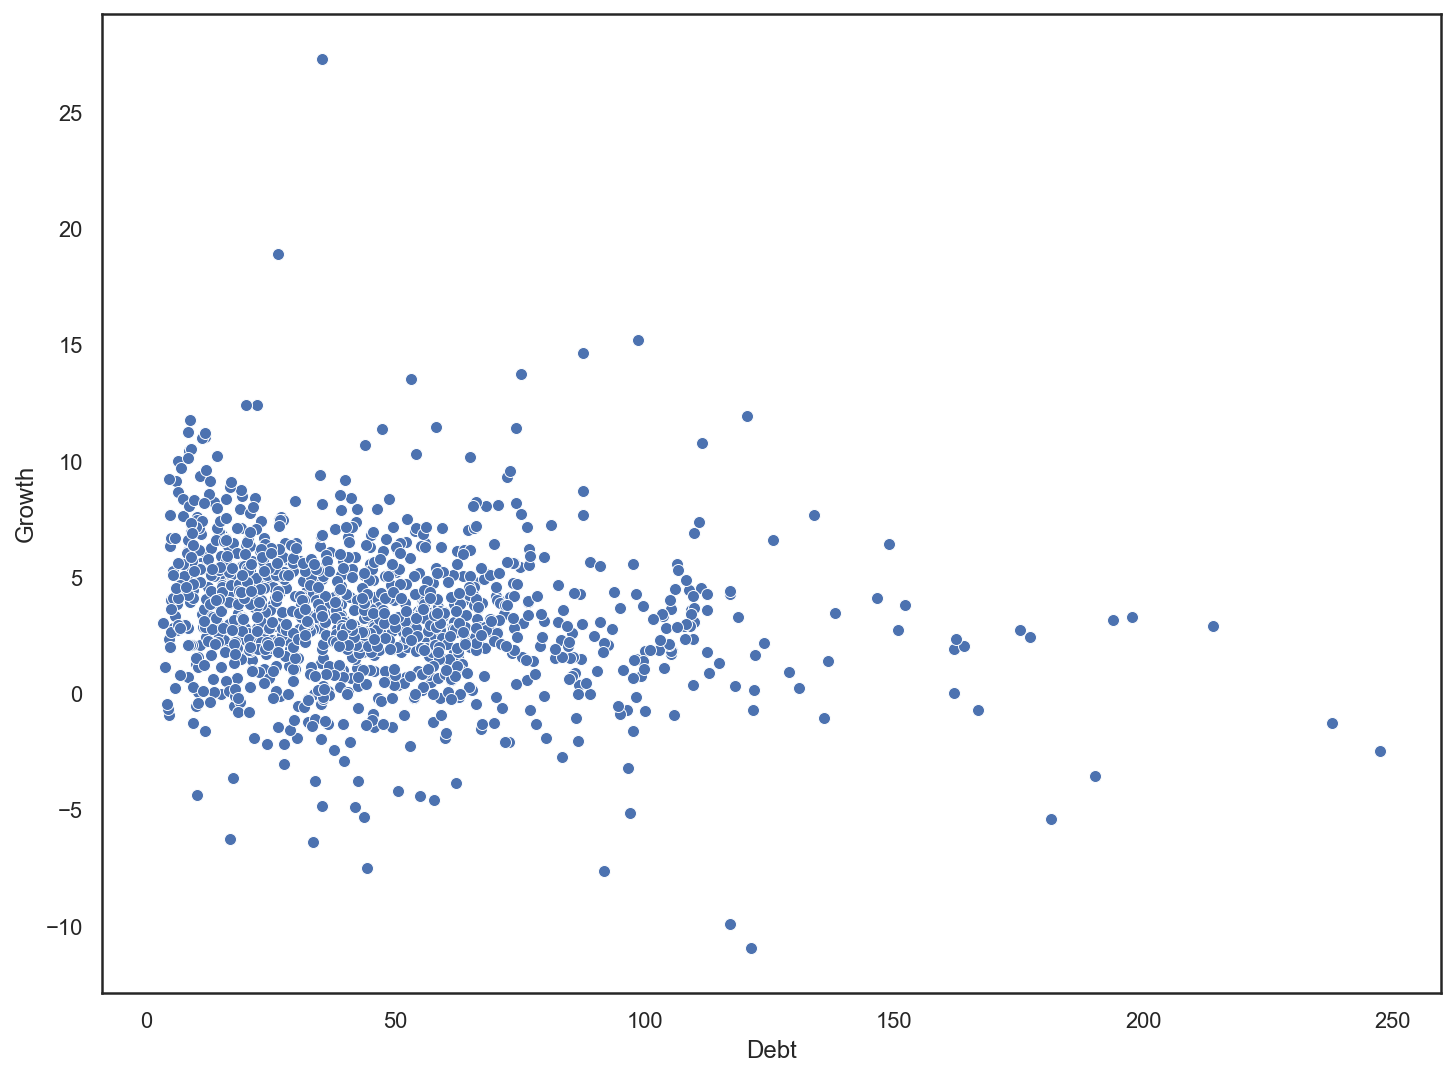

In [230]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 9))

# Plot a scatter instead
sns.scatterplot(x="Debt", y="Growth", data=df, ax=ax);

> The 'step' effect is an artefact due to the misrepresentation of the data. So: (i) **Look at your raw data!**, (ii) **Choose a representation adapted to the structure of your data**.

Adapted from the errors from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a> and the critic from https://scienceetonnante.com/2020/04/17/austerite-excel/ (in French) and corresponding GitHub repo: https://github.com/scienceetonnante/Reinhart-Rogoff. 

To see a (serious) critique of this article: <a href="https://www.peri.umass.edu/images/WP322.pdf">Herndon, T., Ash, M., & Pollin, R. (2014). Does high public debt consistently stifle economic growth? A critique of Reinhart and Rogoff. Cambridge journal of economics, 38(2), 257-279.</a>

One figure from the original paper:
<img src="img/RRfig2.png" width="400">

> It is probably possible to do better: this representation leads to misinterpretation!

### (Bad) Example: Systematically using boxplot for showing distribution

#### It can work sometimes

Sometimes = when the distribution is symetric

In [231]:
x = np.random.normal(0, 1, 1000)

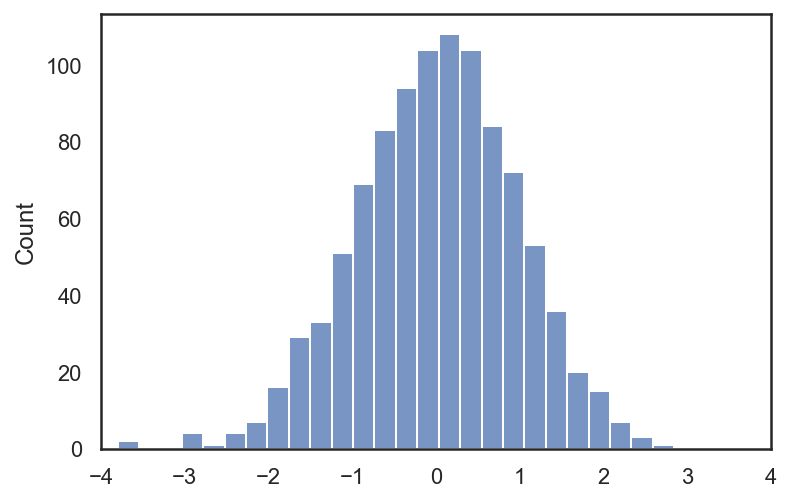

In [232]:
fig, ax = plt.subplots()
sns.histplot(x=x, ax=ax)
ax.set_xlim(-4, 4);

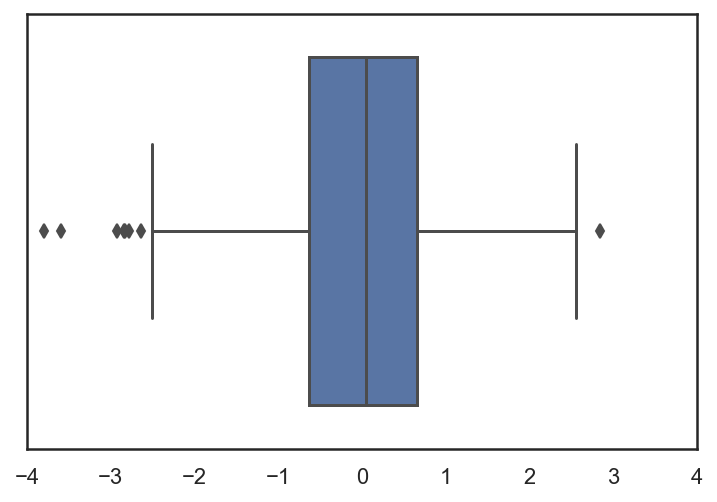

In [233]:
fig, ax = plt.subplots()
sns.boxplot(x=x, ax=ax)
ax.set_xlim(-4, 4);

#### Penguins flipper length

In [234]:
penguins = sns.load_dataset("penguins")
print(penguins.flipper_length_mm)

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64


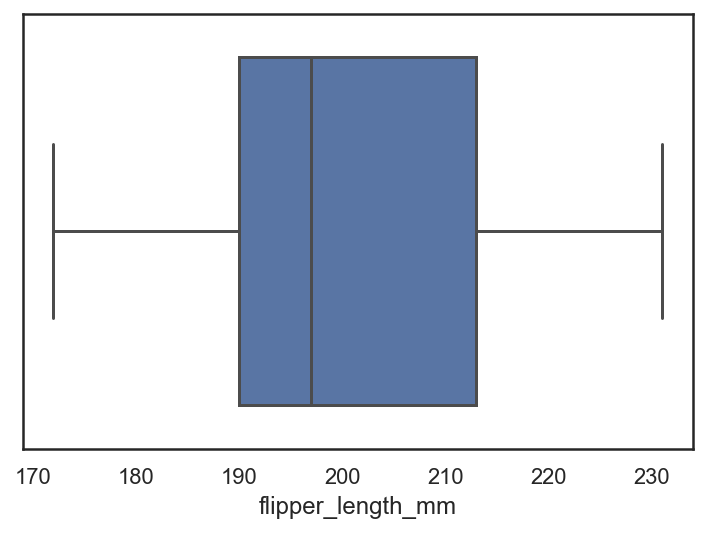

In [235]:
sns.boxplot(data=penguins, x="flipper_length_mm");

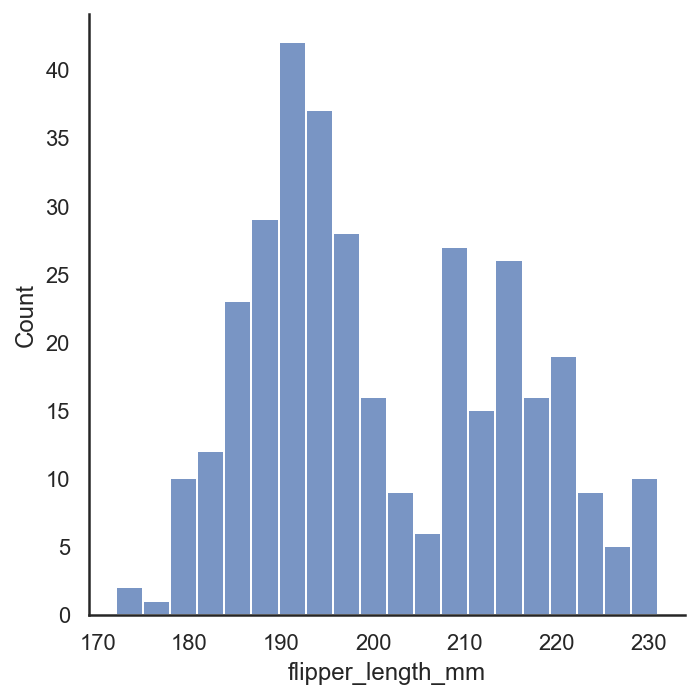

In [236]:
sns.displot(penguins, x="flipper_length_mm", bins=20);

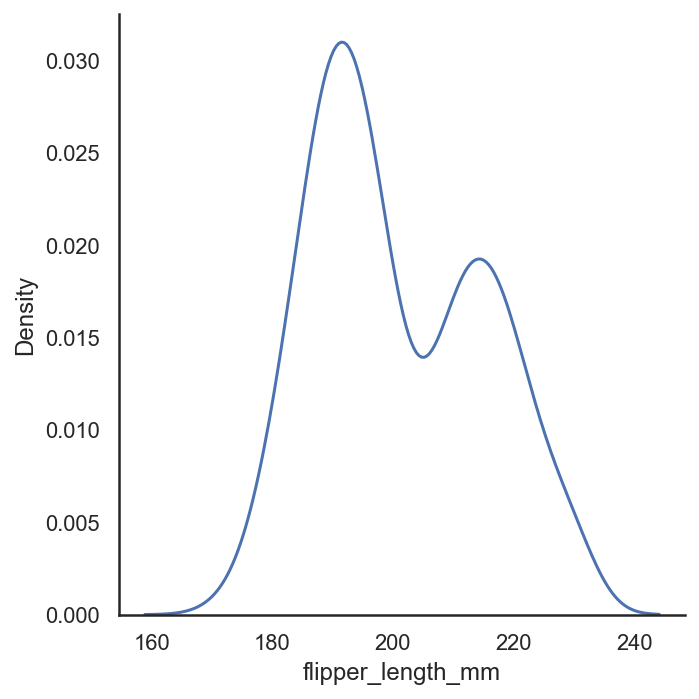

In [237]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

#### Salaries

Data from <a href="https://catalog.data.gov/ro/dataset/annual-salary-2010-thru-2013">data.gov</a> (U.S. General Services Administration)

In [108]:
df = pd.read_csv("data_lec4/Annual_Salary_2010_thru_2013.csv")
df

Agency            AgencyTitle             EmployeeName  \
0          165            Accountancy            ASMATH, MOSAR   
1          165            Accountancy         AUBREY, DONALD F   
2          165            Accountancy        BREN, DIANE MARIE   
3          165            Accountancy             CLARK, ROBIN   
4          165            Accountancy       DONOVAN, KIRSTEN M   
...        ...                    ...                      ...   
339758     691  Yakima Valley College          WRIGHT, TERRY D   
339759     691  Yakima Valley College            YBARRA, TOMAS   
339760     691  Yakima Valley College         YOLO, LAURA JEAN   
339761     691  Yakima Valley College  ZAVALA, DIANN CHRISTINE   
339762     691  Yakima Valley College        ZONTEK, KENNETH S   

                          JobTitle  Salary2010  Salary2011  Salary2012  \
0        FORMS & RECORDS ANALYST 2           0           0           0   
1                     BOARD MEMBER           0         950        1450   
2                       WMS BAND 3       15004           0           0   
3                     BOARD MEMBER         550           0           0   
4         ADMINISTRATIVE TRAINEE 3           0           0           0   
...                            ...         ...         ...         ...   
339758                     FACULTY        5706       17118       15692   
339759  VICE PRES-INSTR & STU SERV      100989       99601       97960   
339760         PROGRAM COORDINATOR           0           0           0   
339761                     FACULTY        6340        3804           0   
339762                     FACULTY       64009       60356       10968   

        Salary2013  
0            32272  
1                0  
2                0  
3                0  
4            15182  
...            ...  
339758       12839  
339759      100506  
339760       29531  
339761           0  
339762       53340  

[339763 rows x 8 columns]

In [132]:
# Don't take into account the zeros that seems to stand for 'missing value'
df=df[df.Salary2013 > 0]

<AxesSubplot:xlabel='Salary2013'>

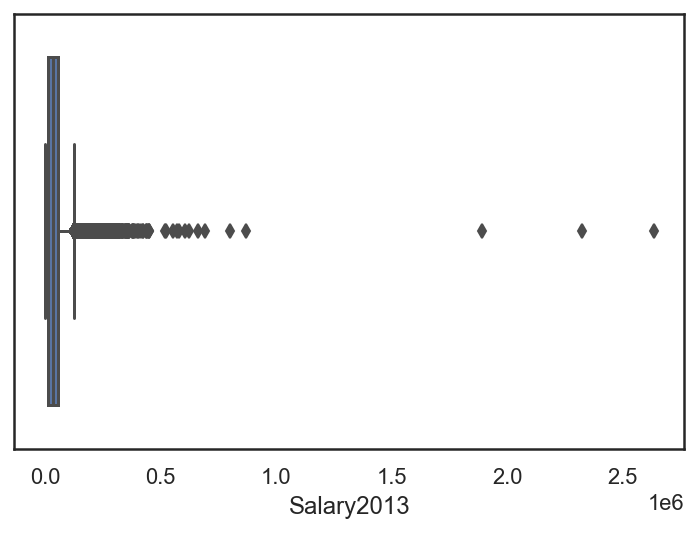

In [133]:
sns.boxplot(data=df, x="Salary2013")

(20.0, 150000.0)

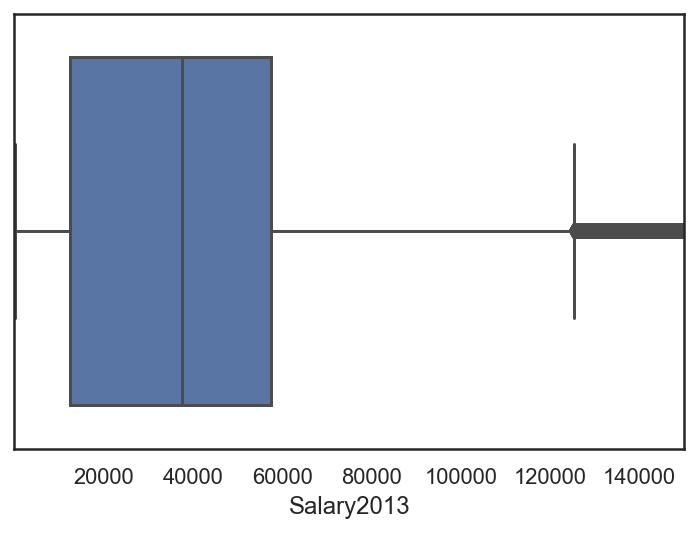

In [139]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="Salary2013", ax=ax)
ax.set_xlim(20, 150000)

(100.0, 100000.0)

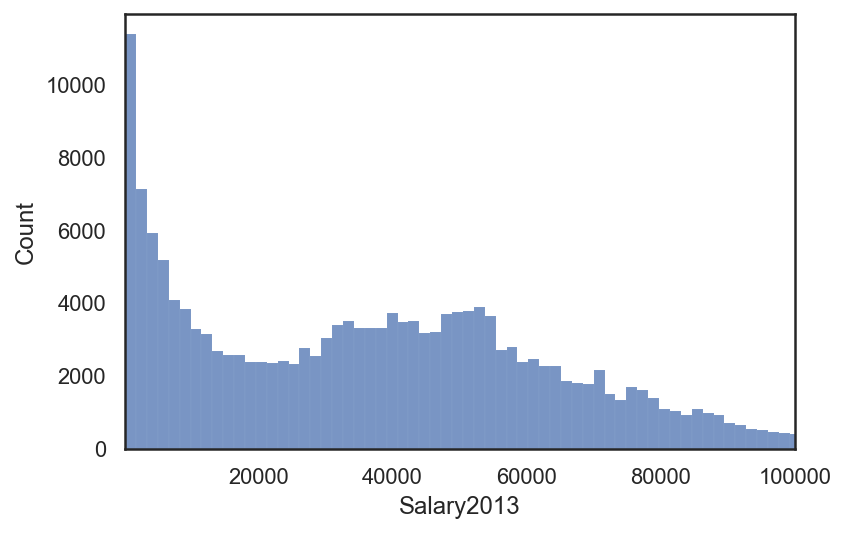

In [129]:
fig, ax = plt.subplots()
sns.histplot(df.Salary2013[df.Salary2013 > 0], ax=ax)
ax.set_xlim(100, 100000)

The box plot **hides the asymmetry** of the distribution. It gives the wrong impression that salaries are centered around the median.

## *Alles ist relativ* (Everything is relative)

...especially human perception.

<div class="alert alert-block alert-info">

**Visual elements are perceived relatively to each other**. Be careful to no induce misinterpretations by ignoring this fact.
</div>

Both examples adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>)

### The circle example

In [217]:
values = [30.,20.,15.,10.]

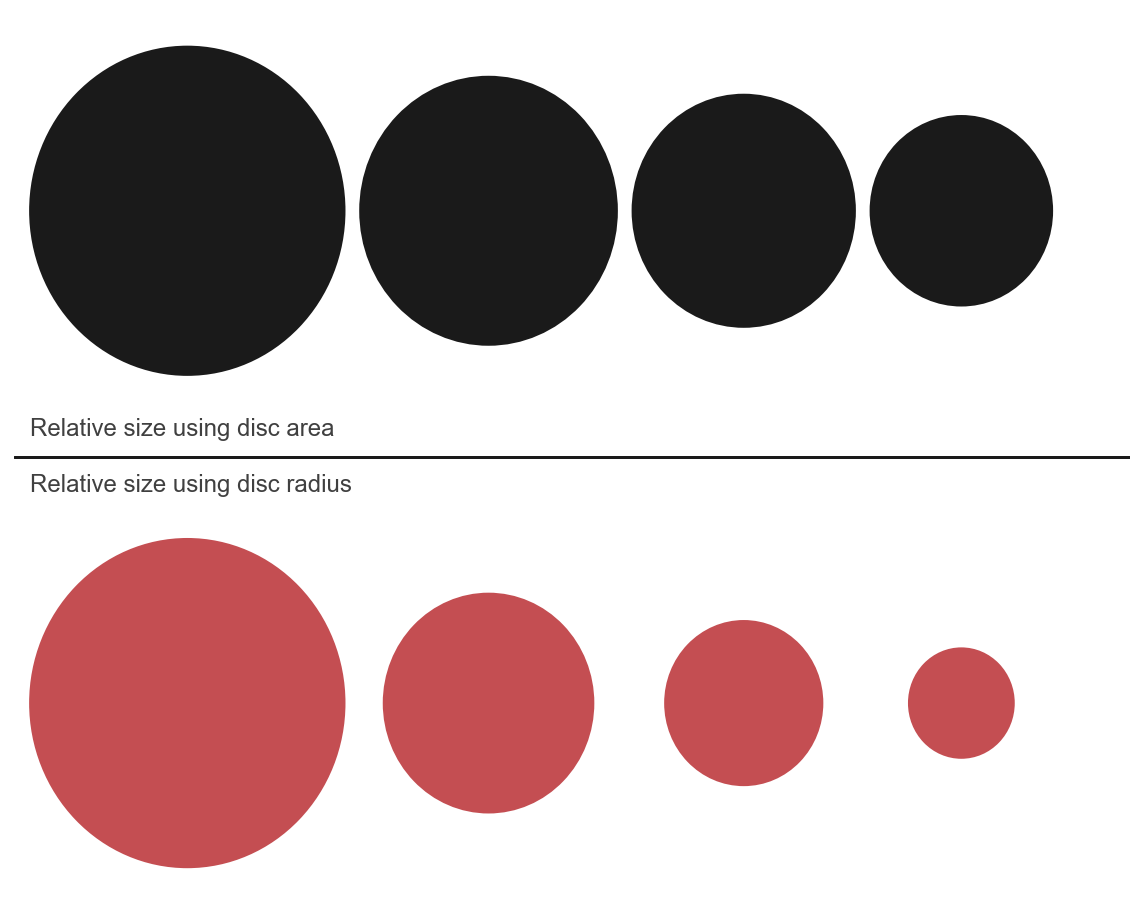

In [216]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_aspect(1)

x, y = 0.0, 0.5
for value in values:
    r1 = .5* (value / values[0])
    r2 = .5* ((np.sqrt(value/np.pi))/(np.sqrt(values[0]/np.pi)))
    ax.add_artist(plt.Circle( (x+r2,y), r1, color='r'))
    ax.add_artist(plt.Circle( (x+r2,1.5+y), r2, color='k'))
    fontsize = 2*value
    x += 2*r2 + 0.05
ax.axhline(1.25, c='k')
ax.text(0.0, 1.25+0.05, "Relative size using disc area",
         ha="left", va="bottom",color=".25")
ax.text(0.0, 1.25-0.05, "Relative size using disc radius",
         ha="left", va="top",color=".25")
ax.set_xlim(-0.05, 3.5)
ax.set_ylim(-0.05, 2.6)
ax.axis('off');

You could mislead your reader in the bottom case by suggesting that there are big differences, while not that much.

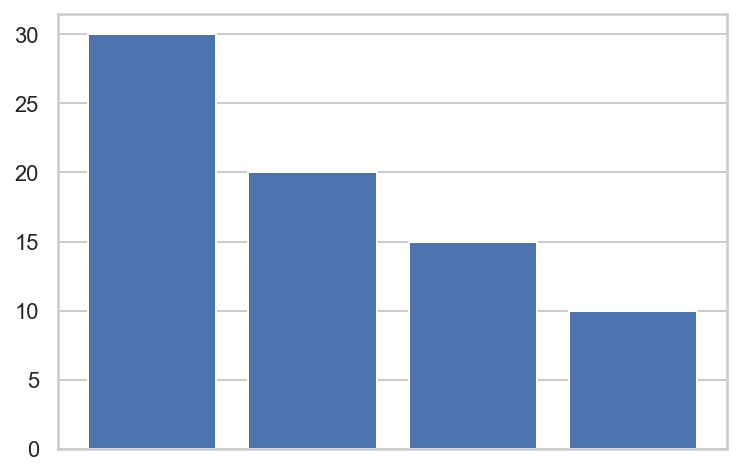

In [422]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.bar(x=np.arange(len(values)), height=values)
ax.set_xticks([]);

### The bar example

#### Example 1: abstract

In [210]:
n = 10
np.random.seed(123)
X = 0.25+np.arange(n)
Y = 2+np.random.uniform(.75,.85,n)

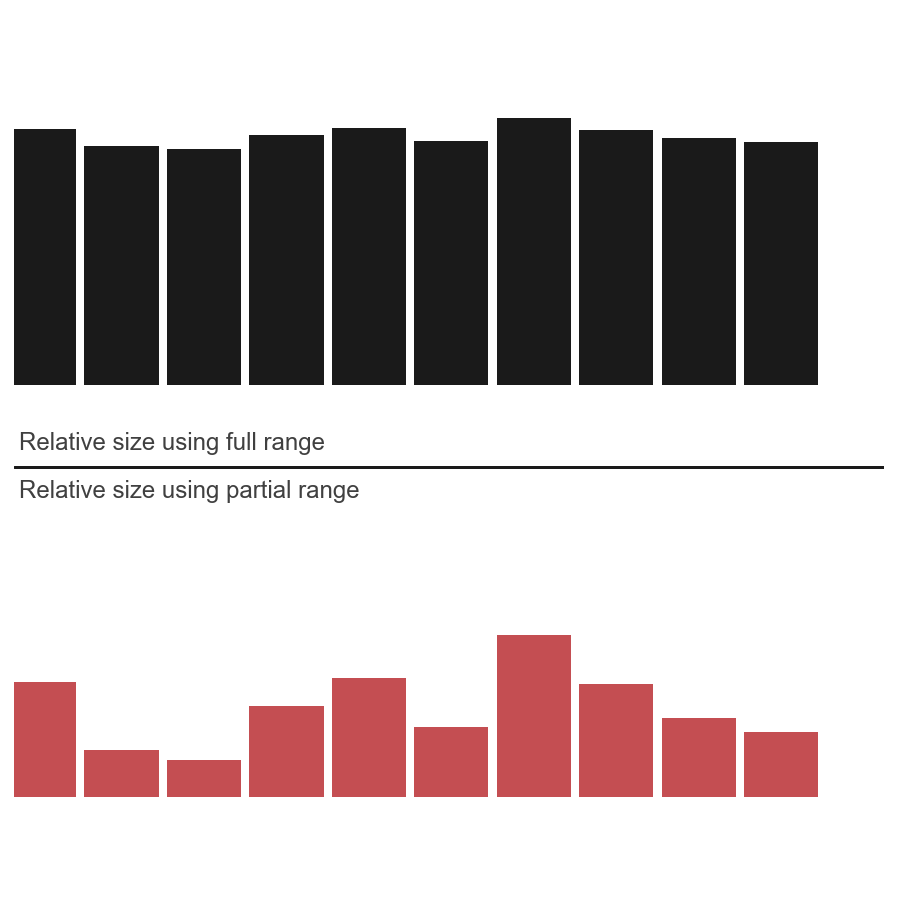

In [213]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect(1)

ax.axhline(5, c='k')
ax.text(0.0, 5+0.15, "Relative size using full range",
         ha="left", va="bottom",color=".25")
ax.text(0.0, 5-0.15, "Relative size using partial range",
         ha="left", va="top",color=".25")

ax.bar(X, 5*(Y-2.2), .9, color='k', ec='None',bottom=6)
ax.bar(X, 20*(Y-2.75), .9, color='r', ec='None',bottom=1)

ax.set_xlim(-0.05, 10.5)
ax.set_ylim(-0.05, 10.5)
ax.axis('off');

Note that errors bars could help here, if available (see next subsection)!

#### Example 2: Companies Revenues

Example adapted from [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py), initially for a different purpose (explaining the "lifecycle of a plot").

In [423]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

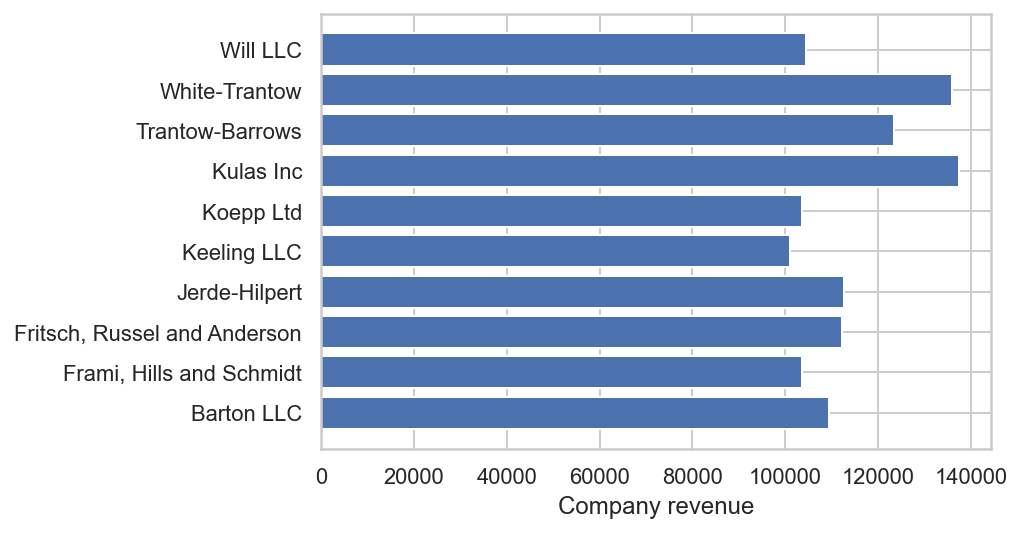

In [429]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
ax.set_xlabel("Company revenue");

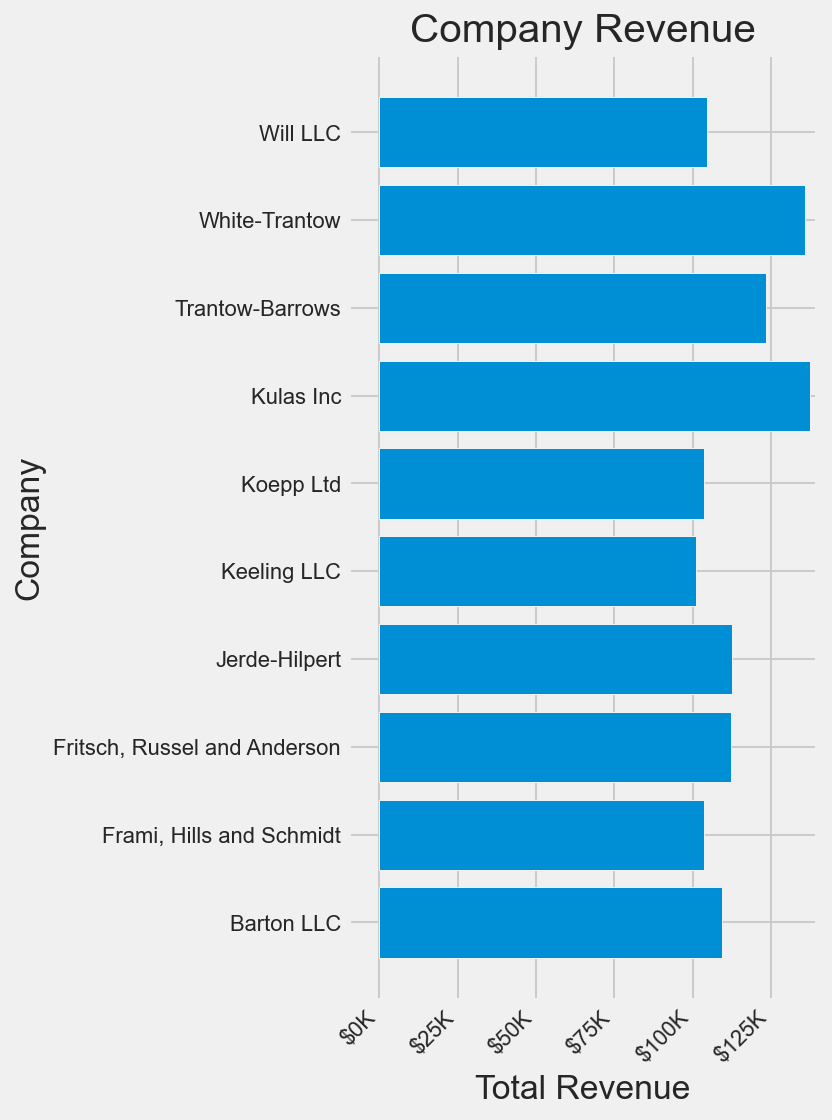

In [431]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

## Do give an indication of the underlying data dispersion

<div class="alert alert-block alert-info">

**The dispersion of the data** is important to correctly **evaluate a difference**. Otherwise, you can easily suggest that there is a huge difference when there is not.
</div>

### Basic example

#### Generate data <a class="tocSkip"></a>

In [10]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
mean_1 = 150.0
mean_2 = 200.0

small_std = 10.0
large_std = 50.0

n = 100

In [11]:
# Create the samples
val1_small_std = np.random.normal(mean_1, scale=large_std, size=n)
val2_small_std = np.random.normal(mean_2, scale=large_std, size=n)

val1_large_std = np.random.normal(mean_1, scale=small_std, size=n)
val2_large_std = np.random.normal(mean_2, scale=small_std, size=n)

# Print a few values
print("val1_small_std (3 first values):", val1_small_std[:3])
print("val2_small_std (3 first values):", val2_small_std[:3])
print("val1_large_std (3 first values):", val1_large_std[:3])
print("val2_large_std (3 first values):", val2_large_std[:3])

val1_small_std (3 first values): [152.52808536 174.99756666 100.20455344]
val2_small_std (3 first values): [236.91235556 232.53766155 230.73703148]
val1_large_std (3 first values): [145.27337184 150.96267944 162.29213395]
val2_large_std (3 first values): [211.9451626  195.01279275 199.19260386]


#### Visualize the distribution <a class="tocSkip"></a>

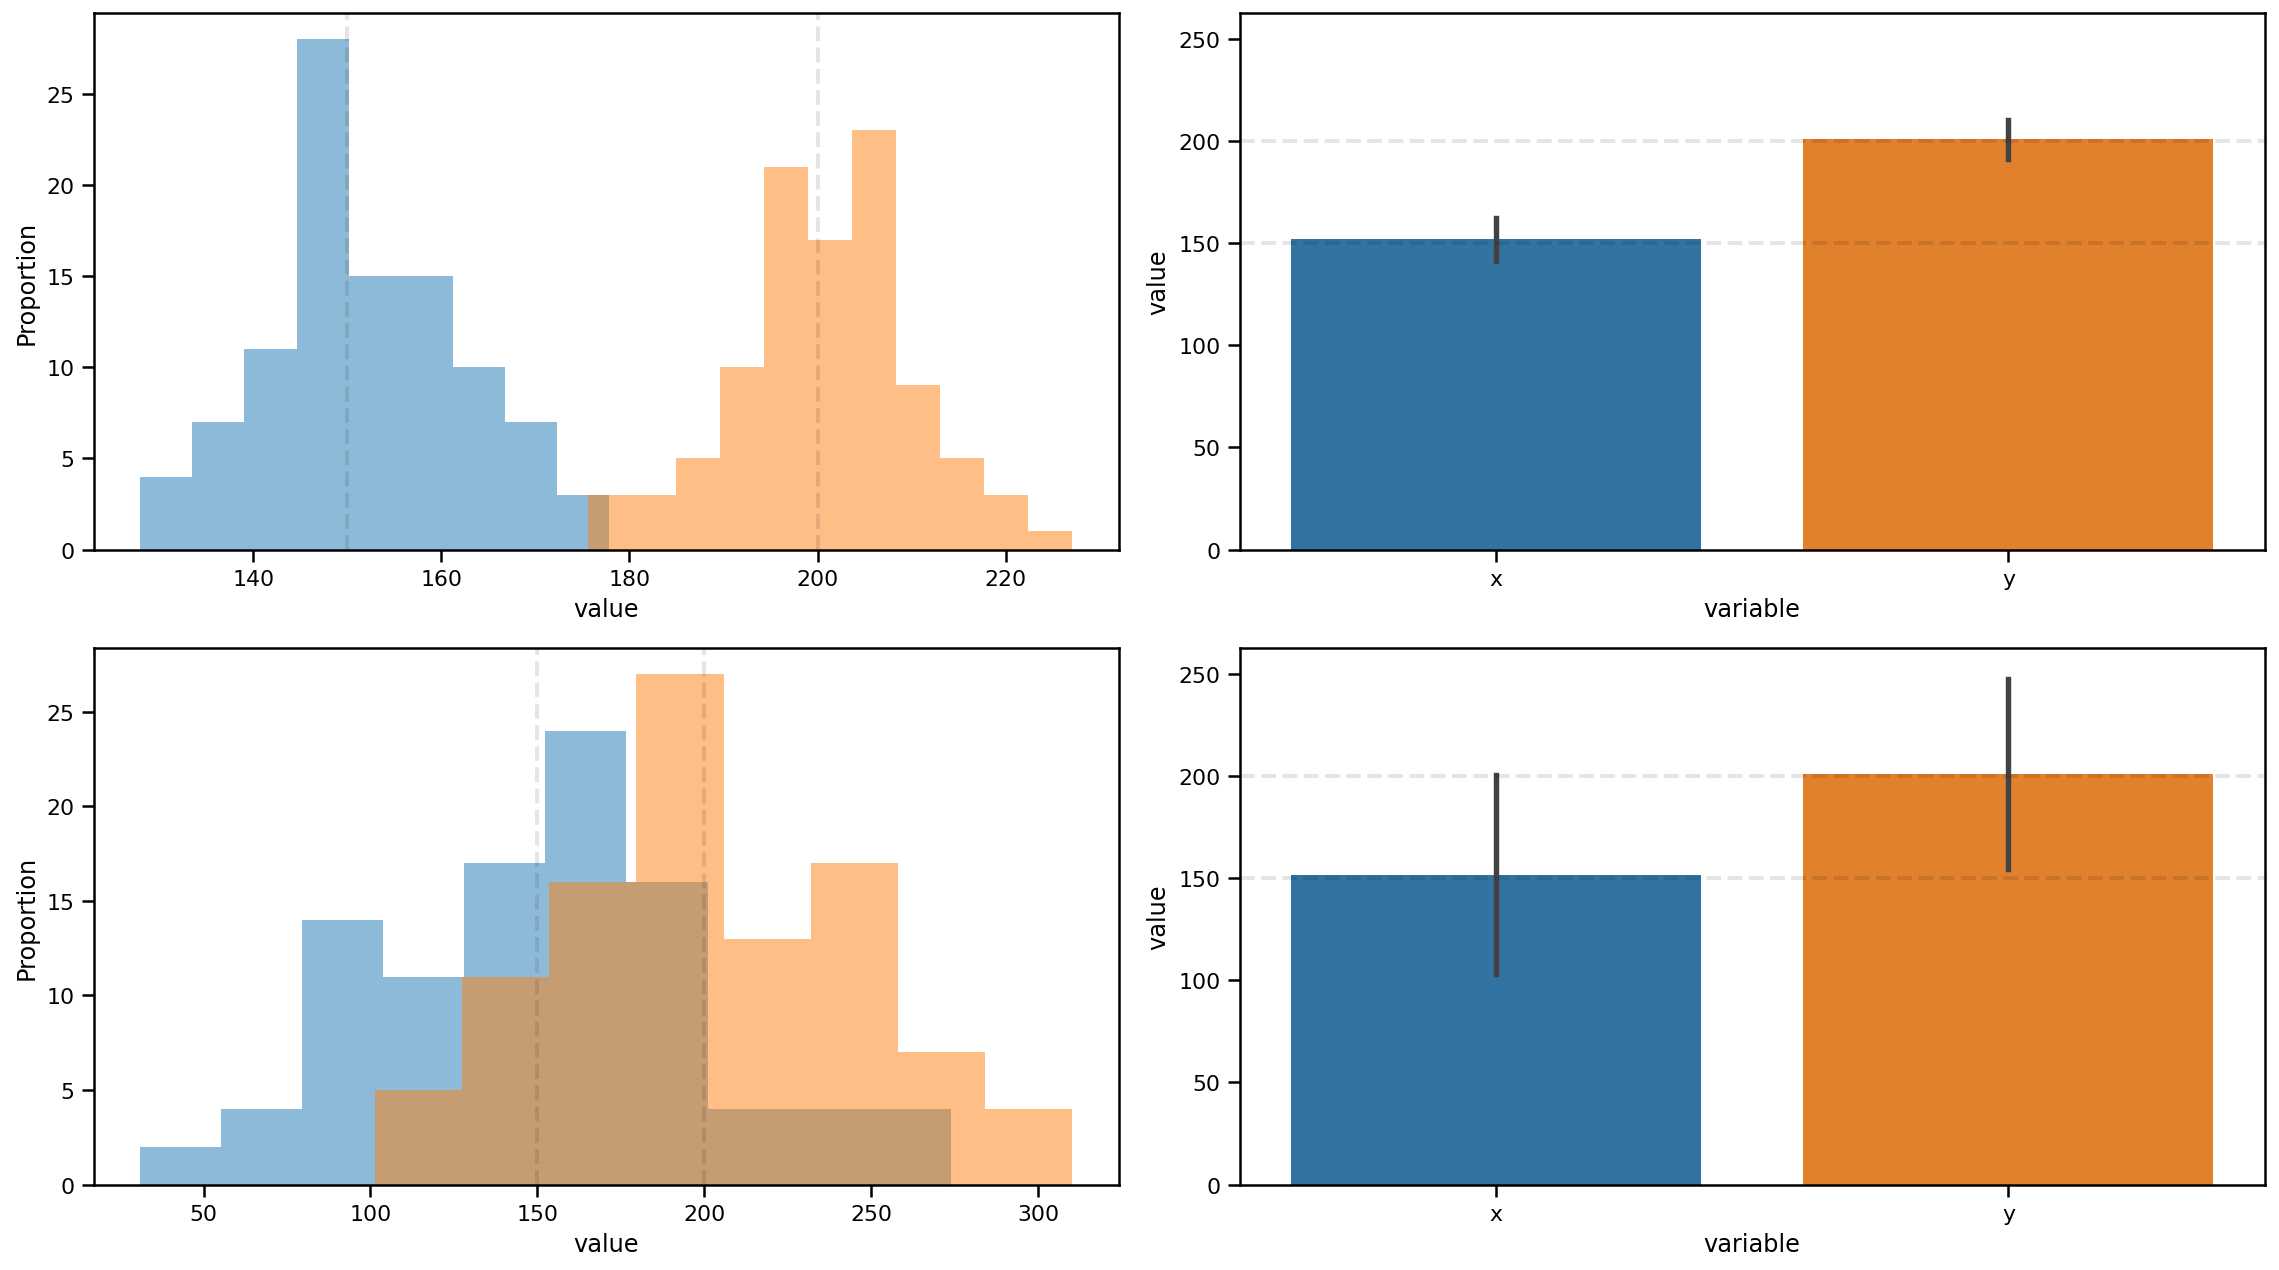

In [12]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

# For each dataset (containing each two samples)
for i, (val1, val2) in enumerate(((val1_large_std, val2_large_std),
                                  (val1_small_std, val2_small_std))):

    # Create histograms
    ax = axes[i, 0]
    sns.histplot(x=val1, ax=ax, color="C0", kde=False, alpha=0.5, lw=0)
    sns.histplot(x=val2, ax=ax, color="C1", kde=False, alpha=0.5, lw=0)
    
    # Plot the theoretical mean
    ax.axvline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axvline(mean_2, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the axis lables
    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    # Create a barplot
    ax = axes[i, 1]
    df = pd.DataFrame({"x": val1, "y": val2}).melt()
    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")
    
    # Add horizontal lines representing the means
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the y limits
    ax.set_ylim(0, max(mean_1, mean_2) + large_std * 1.25)

plt.tight_layout()
plt.show()

> The difference of means are identical but the dispersions are different. In one case, it seems adequate to consider that there is a difference between $X$ and $Y$, while it is not that evident in the other. **Always look at the dispersion** (STD/variance)!

### One bad example

Remember this figure from  the <a href="https://www.nature.com/articles/365611a0"> Mozart effect's paper</a>:

<img src="img/mozart.png" width="300">

## Do NOT forget textual information

Do not forget to add an adequate title, axis labels, legend, and caption

<img src="img_lec4/graph_anatomy.png" width="800">

<img src="img_lec4/figurelegend.png" width="800">

Figures from <a href="https://www.clips.edu.au/displaying-data/">CLIPS (University of Queensland)</a>.

# Transmit the message efficiently

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
**Graphical properties** of your figures will greatly impact the **readability of the underlying message**.
</div>

## Do NOT trust the default options

<div class="alert alert-block alert-info">

Often, the **default options** are terribly bad.
</div>

Let's use one 'toy' dataset (from <a href="http://sthda.com/english/wiki/r-built-in-data-sets">R built-in datasets</a>).

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Description of variables:

`mpg`: Miles/(US) gallon

`cyl`: Number of cylinders

`disp`: Displacement (cu.in.)

`hp`: Gross horsepower

`drat`: Rear axle ratio

`wt`: Weight (1000 lbs)

`qsec`: 1/4 mile time

`vs`: V/S

`am`: Transmission (0 = automatic, 1 = manual)

`gear`: Number of forward gears

`carb`: Number of carburetors

In [35]:
df = pd.read_csv("data_lec4/mt_cars.csv", index_col=0)
df

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3    8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2    8  275.8  180  3.07  3.780  18.00   0   0     3   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Chrysler Imperial    14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Toyota Corona        21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
Dodge Challenger     15.5    8  318.0  150  2.76  3.520  16.87   0   0     3   
AMC Javelin          15.2    8  304.0  150  3.15  3.435  17.30   0   0     3   
Camaro Z28           13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Porsche 914-2        26.0    4  120.3   91  4.43  2.140  16.70   0   1     5   
Lotus Europa         30.4    4   95.1  113  3.77  1.513  16.90   1   1     5   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Ferrari Dino         19.7    6  145.0  175  3.62  2.770  15.50   0   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   
Volvo 142E           21.4    4  121.0  109  4.11  2.780  18.60   1   1     4   

                     carb  
Mazda RX4               4  
Mazda RX4 Wag           4  
Datsun 710              1  
Hornet 4 Drive          1  
Hornet Sportabout       2  
Valiant                 1  
Duster 360              4  
Merc 240D               2  
Merc 230                2  
Merc 280                4  
Merc 280C               4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Cadillac Fleetwood      4  
Lincoln Continental     4  
Chrysler Imperial       4  
Fiat 128                1  
Honda Civic             2  
Toyota Corolla          1  
Toyota Corona           1  
Dodge Challenger        2  
AMC Javelin             2  
Camaro Z28              4  
Pontiac Firebird        2  
Fiat X1-9               1  
Porsche 914-2           2  
Lotus Europa            2  
Ford Pantera L          4  
Ferrari Dino            6  
Maserati Bora           8  
Volvo 142E              2

Let's represent the milage per gallon against the weight for each of the $32$ cars.

### Using Matplotlib defaults

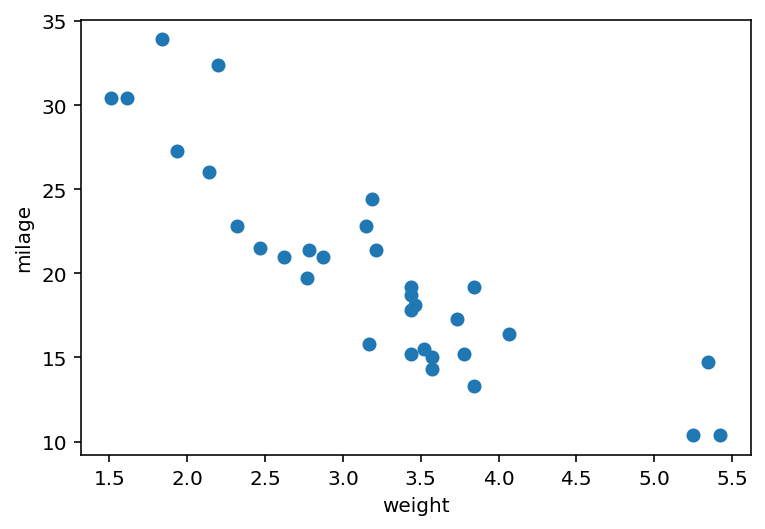

In [38]:
sns.reset_orig()  # Reset to default
fig, ax = plt.subplots()
ax.scatter(df.wt, df.mpg)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

### Using R defaults

<img src="img_lec4/cars_r.png" width="400" align="left">

### Using Matlab defaults

<img src="img_lec4/cars_matlab.png" width="400" align="left">

### Using Excel defaults

<img src="img_lec4/cars_excel.png" width="400" align="left">

### Using Numbers (MacOS) defaults

<img src="img_lec4/cars_numbers.png" width="400" align="left">

### Using Seaborn defaults

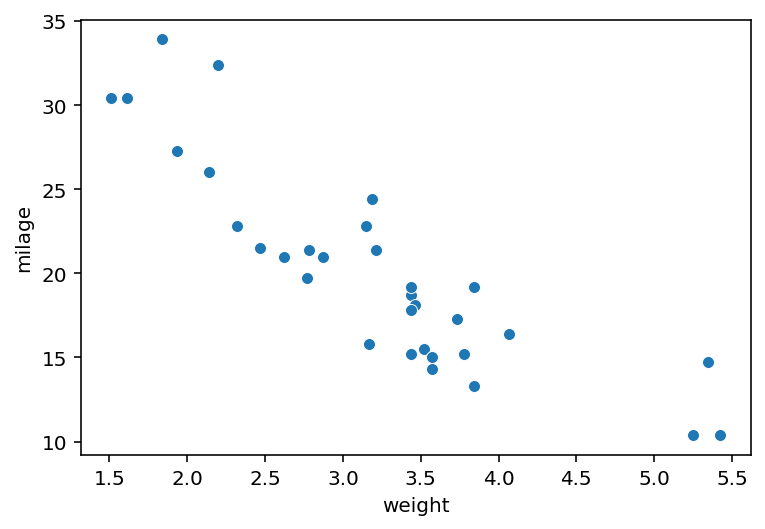

In [46]:
sns.reset_orig()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

However, Seaborn propose several defaults. The more default of the defaults is by calling 
`sns.set()`

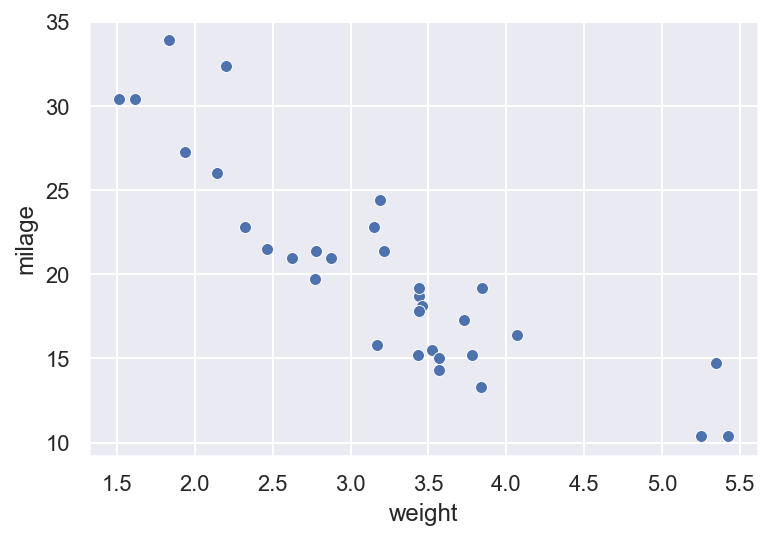

In [48]:
sns.reset_orig()
sns.set()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

Other 'defaults' can be set by using `sns.set_theme`, choosing a `context` (default is "notebook", alternatives are "paper", "talk", and "poster"), and a `style` (default is "darkgrid", alternatives are "whitegrid", "dark", "white", "ticks").

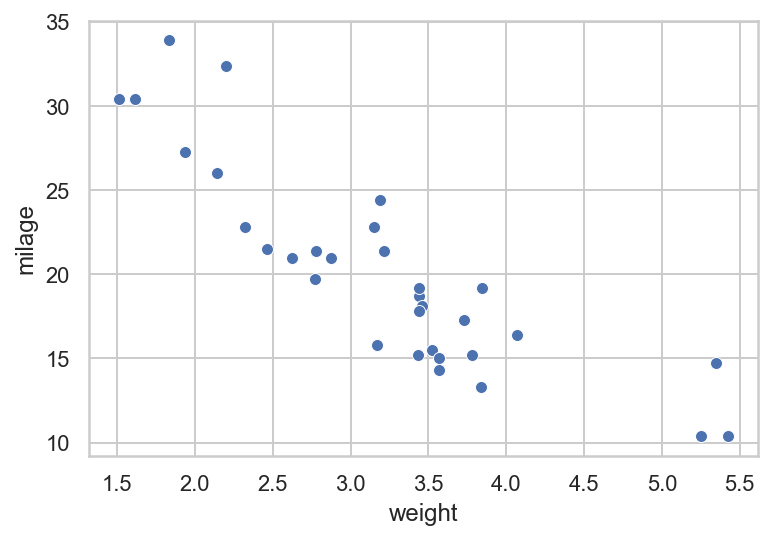

In [50]:
sns.reset_orig()
sns.set_theme(style='whitegrid',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

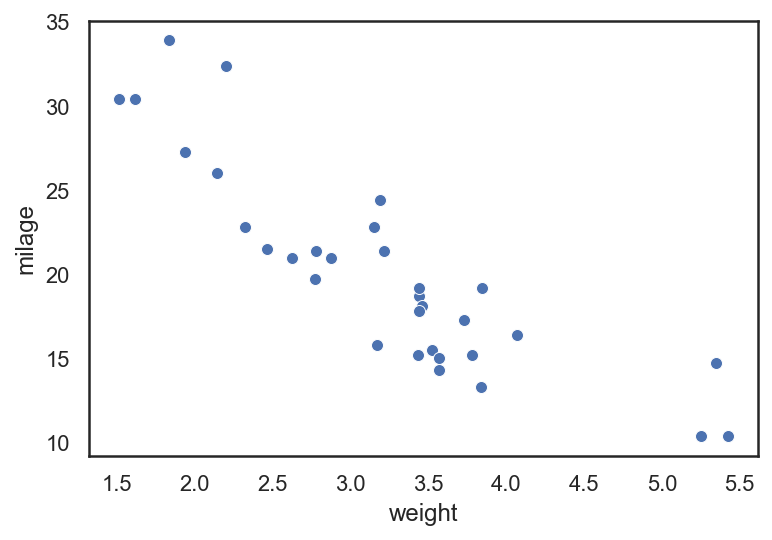

In [51]:
sns.reset_orig()
sns.set_theme(style='white',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

## Do NOT ignore saliency effects

<div class="alert alert-block alert-info">

Human perception is relative: **the context** will greatly influence **the visibility of an object**.
</div>

...or pop-out effects

Here are a few examples from Collin Ware's book <a href="https://www.elsevier.com/books/visual-thinking-for-design/ware/978-0-12-370896-0">Visual Thinking for Design</a>, accessible <a href="https://github.com/greenore/cs171-coursework/blob/master/Visual%20Thinking%20for%20Design%20-%20Colin%20Ware.pdf">here</a>.

<img src="img_lec4/popout1.png" width="400">
<img src="img_lec4/popout2.png" width="400">
<img src="img_lec4/popout3.png" width="400">
<img src="img_lec4/popout5.png" width="400">

This can be used to data visualization (example also from *Visual thinking for design*):

<img src="img_lec4/popout4.png" width="600">

## Do NOT overload your figures

<div class="alert alert-block alert-info">

Don't forget what is the purpose of your figure. An **excessive number of features will harm the readability of your message**.
</div>

In [268]:
p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

data = np.concatenate((np.atleast_2d(X), Y), axis=0).T
columns = ["X", ] + [f"Y{i+1}" for i in range(p) ]
df = pd.DataFrame(data=data, columns=columns)
df

X        Y1        Y2        Y3        Y4        Y5        Y6  \
0   0.000000  0.027349 -0.623365 -0.229841 -0.692211 -0.412034 -0.096877   
1   0.064516  0.014170 -0.336723  0.019722 -0.366239  0.346462 -0.196319   
2   0.129032  0.480815 -0.601909 -0.116137  0.246915 -0.110470  0.479770   
3   0.193548 -0.405111  0.469998 -0.681615  0.429797  0.359862 -0.301226   
4   0.258065  0.032683  0.311403 -0.490110 -0.236304  0.360998 -0.624608   
5   0.322581 -0.254897  0.045807 -0.533064  0.219125  0.492641  0.467963   
6   0.387097  0.171563 -0.659538 -0.110485  0.359171  0.205290 -0.174372   
7   0.451613 -0.298247 -0.202242 -0.492904 -0.429369  0.035230 -0.146023   
8   0.516129  0.285966  0.367864  0.186891  0.034364 -0.145203 -0.091248   
9   0.580645 -0.404179  0.019903 -0.643349  0.442235  0.344365 -0.432912   
10  0.645161  0.115349 -0.259105 -0.256435 -0.030278 -0.139885  0.061093   
11  0.709677 -0.487325 -0.283884  0.353274  0.153412  0.431299  0.148054   
12  0.774194  0.201118 -0.529907  0.439359 -0.602162  0.185219  0.008534   
13  0.838710 -0.101781 -0.746193 -0.360239 -0.241133 -0.046341 -0.015073   
14  0.903226 -0.453932 -0.076743 -0.493333 -0.303764 -0.417884 -0.223388   
15  0.967742  0.178116  0.083714 -0.724285  0.225809 -0.338506  0.064594   
16  1.032258 -0.604322 -0.491377  0.123992 -0.578338 -0.555867 -0.661206   
17  1.096774  0.141290 -0.017395 -0.659300  0.208404  0.210012 -0.293736   
18  1.161290  0.206566 -0.239915  0.496581 -0.064541  0.084611 -0.723783   
19  1.225806 -0.078356 -0.606039 -0.374890  0.050442  0.179148 -0.032375   
20  1.290323 -0.083487 -0.084469  0.453343  0.414875 -0.165880  0.428231   
21  1.354839  0.199016  0.286978  0.154646  0.208691  0.445257  0.414802   
22  1.419355 -0.042259  0.003554 -0.234456 -0.079184 -0.549211  0.141810   
23  1.483871 -0.656713 -0.254704 -0.348073 -0.408306 -0.353945 -0.086498   
24  1.548387 -0.657734 -0.720711  0.088746 -0.262050 -0.181219  0.224181   
25  1.612903  0.445022 -0.430106  0.413202 -0.459673 -0.697904 -0.458180   
26  1.677419 -0.133406  0.005763 -0.416174 -0.425952  0.150697 -0.387940   
27  1.741935  0.080338  0.108469  0.056397  0.060656 -0.397291 -0.322507   
28  1.806452 -0.294213 -0.339536 -0.207633 -0.274746 -0.460566 -0.189634   
29  1.870968 -0.303106 -0.497715 -0.701752  0.464598  0.027918  0.353823   
30  1.935484  0.106238  0.212356 -0.686105 -0.468496  0.317119  0.246974   
31  2.000000 -0.361522 -0.636355 -0.693109  0.135895 -0.711631 -0.106698   

          Y7  
0  -0.101638  
1  -0.528396  
2  -0.287825  
3   0.107161  
4   0.353158  
5   0.009283  
6   0.140009  
7   0.239651  
8   0.082504  
9   0.291516  
10  0.103025  
11  0.337884  
12  0.344404  
13  0.397559  
14  0.188633  
15 -0.736807  
16 -0.057947  
17 -0.631748  
18  0.325333  
19 -0.166459  
20 -0.733236  
21 -0.307138  
22  0.265117  
23  0.258367  
24  0.406685  
25  0.032049  
26  0.147758  
27 -0.626559  
28 -0.369127  
29 -0.611527  
30 -0.002969  
31 -0.185163

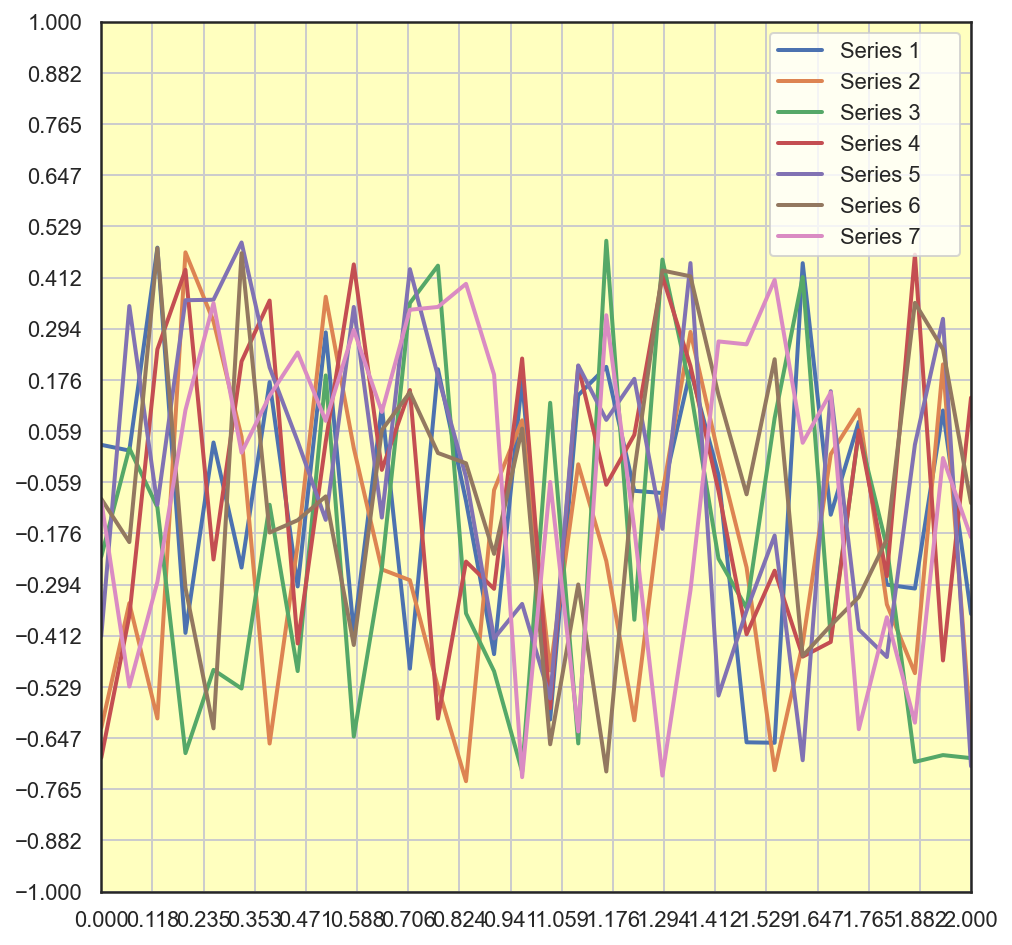

In [270]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_aspect(1)
ax.patch.set_facecolor((1,1,.75))
for i in range(p):
    plt.plot(X, Y[i], label = "Series %d     " % (1+i), lw=2)
plt.xlim( 0,2)
plt.ylim(-1,1)
plt.yticks(np.linspace(-1,1,18))
plt.xticks(np.linspace(0,2,18))
plt.legend()
plt.grid()

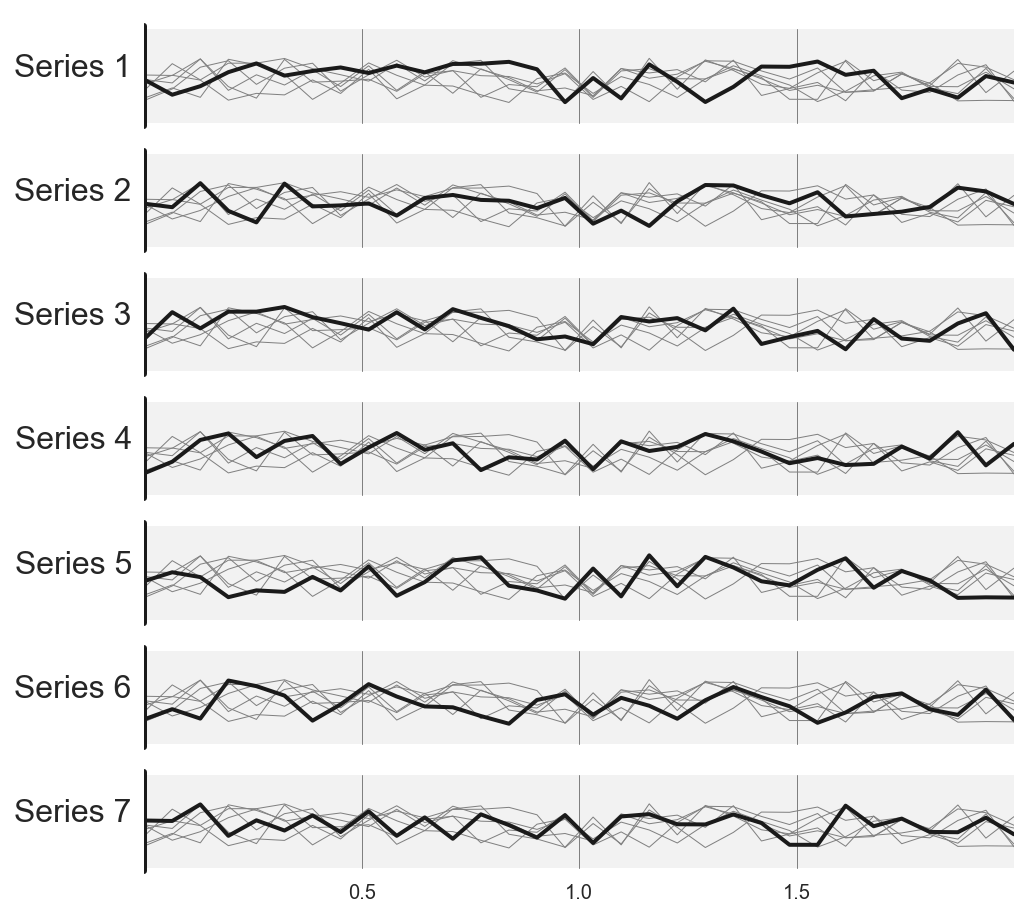

In [272]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_aspect(1)

Yy = p-(np.arange(p)+0.5)
Xx = [p,]*p
rects = plt.barh(Yy, Xx, align='center', height=0.75, color='.95', ec='None', zorder=-20)
plt.xlim(0,p), plt.ylim(0,p)

for i in range(p):
    label = "Series %d" % (1+i)
    plt.text(-.1, Yy[i], label, ha = "right", fontsize=16)
    plt.axvline(0,   (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
    plt.axvline(.25*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.50*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.axvline(.75*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    plt.plot(X*p/2, i+.5+2*Y[i]/p, c='k', lw=2)
    for j in range(p):
        if i != j:
            plt.plot(X*p/2, i+.5+2*Y[j]/p, c='.5', lw=.5, zorder=-10)
plt.text(.25*p, 0, "0.5", va = "top", ha="center", fontsize=10)
plt.text(.50*p, 0, "1.0", va = "top", ha="center", fontsize=10)
plt.text(.75*p, 0, "1.5", va = "top", ha="center", fontsize=10)
plt.axis('off')
plt.show()

## Play with transparency and width

<div class="alert alert-block alert-info">

Playing with **transparency** and **width** of the objects is an **easy tweak** to improve your visuals 
</div>

### Basic example with a scatter plot

In [187]:
np.random.seed(123)
x = np.random.normal(0, 1, size=500)
y = x + np.random.normal(0, 0.5, size=500)

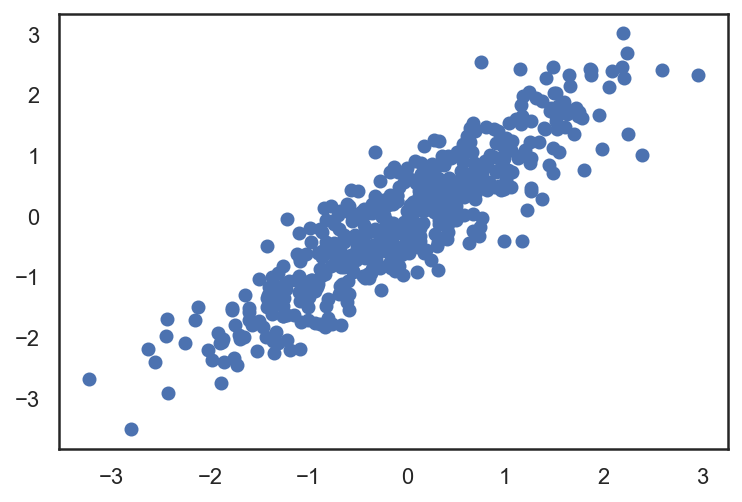

In [188]:
fig, ax = plt.subplots()
ax.scatter(x, y)

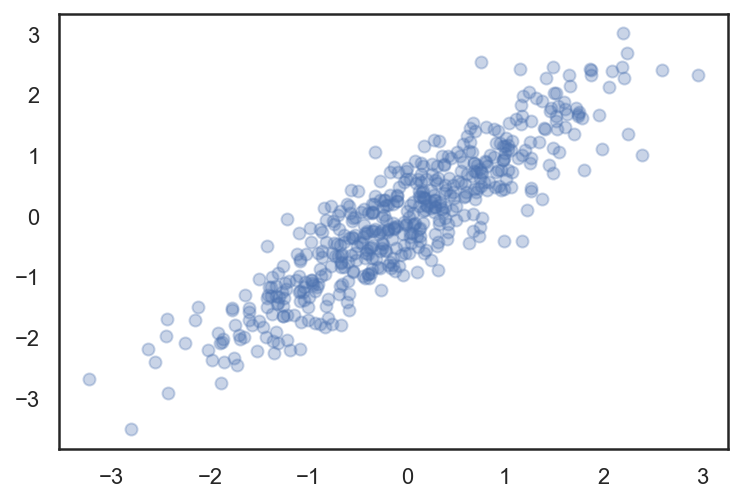

In [194]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.3, lw=1)

### Time series example

Example inspired from <a href="https://peterroelants.github.io/posts/gaussian-process-tutorial/"> this blog post about Gaussian processes</a>. I use here part of the introduction about Brownian motion:

> An example of a stochastic process that you might have come across is the model of [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) (also known as [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) ). Brownian motion is the random motion of particles suspended in a fluid. It can be seen as a continuous [random walk](https://en.wikipedia.org/wiki/Random_walk) where a particle moves around in the fluid due to other particles randomly bumping into it. We can simulate this process over time $t$ in 1 dimension $d$ by starting out at position 0 and moving the particle over a certain amount of time $\Delta t$ with a random distance $\Delta d$ from the previous position. The random distance is sampled from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $0$ and variance $\Delta t$. Sampling $\Delta d$ from this normal distribution is noted as $\Delta d \sim \mathcal{N}(0, \Delta t)$. The position $d(t)$ at time $t$ evolves as $d(t + \Delta t) = d(t) + \Delta d$.

In [389]:
# 1D simulation of the Brownian motion process
total_time = 1
nb_steps = 75
delta_t = total_time / nb_steps
nb_processes = 10  # Simulate different motions
mean = 0.  # Mean of each movement
stdev = np.sqrt(delta_t)  # Standard deviation of each movement
np.random.seed(123)

X = np.arange(0, total_time, delta_t)

# Simulate the brownian motions in a 1D space by cumulatively
#  making a new movement delta_d
Y = np.cumsum(
    # Move randomly from current location to N(0, delta_t)
    np.random.normal(
        mean, stdev, (nb_processes, nb_steps)),
    axis=1)

In [390]:
data = np.concatenate((np.atleast_2d(X), Y), axis=0).T
columns = ["X", ] + [f"Y{i+1}" for i in range(nb_processes) ]
df = pd.DataFrame(data=data, columns=columns)
df

X        Y1        Y2        Y3        Y4        Y5        Y6  \
0   0.000000 -0.125358  0.120057  0.029308 -0.163820  0.088341  0.079764   
1   0.013333 -0.010194  0.073481  0.062070 -0.263752 -0.007382  0.024440   
2   0.026667  0.022481  0.058928 -0.100961 -0.422487 -0.083495  0.066015   
3   0.040000 -0.151451 -0.037780 -0.317683 -0.565364 -0.012928  0.109538   
4   0.053333 -0.218262 -0.223221 -0.435423 -0.551040 -0.029557 -0.019638   
..       ...       ...       ...       ...       ...       ...       ...   
70  0.933333  0.704683  0.410053 -0.725745 -1.640756 -1.053622 -0.552979   
71  0.946667  0.608709  0.462739 -0.789478 -1.424157 -1.121630 -0.698106   
72  0.960000  0.742909  0.641088 -0.817791 -1.376157 -0.991016 -0.667854   
73  0.973333  0.616215  0.613413 -0.859550 -1.357619 -0.975418 -0.479691   
74  0.986667  0.371061  0.629961 -0.749091 -1.262961 -1.115399 -0.472093   

          Y7        Y8        Y9       Y10  
0   0.014940  0.047668  0.131712  0.072552  
1  -0.130846  0.117052  0.040702 -0.112712  
2  -0.292849 -0.013618  0.071329  0.075403  
3  -0.366483  0.065687  0.028342  0.176434  
4  -0.404186  0.133326  0.163974  0.217111  
..       ...       ...       ...       ...  
70  0.486630  1.649836  0.103107  1.198183  
71  0.402786  1.577018 -0.068014  1.299961  
72  0.334621  1.416010  0.072868  1.402434  
73  0.294441  1.521398  0.024793  1.317858  
74  0.242665  1.374339  0.029200  1.462983  

[75 rows x 11 columns]

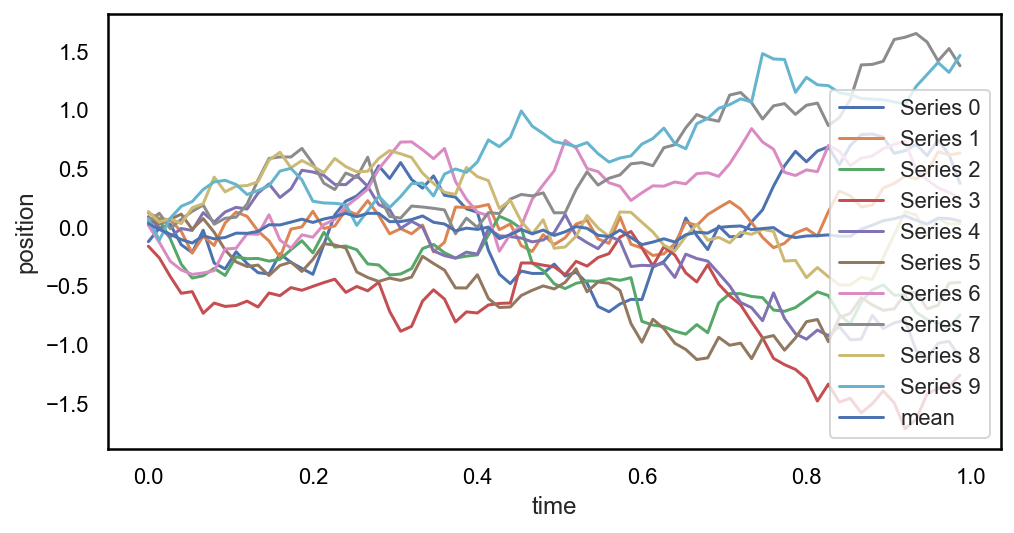

In [397]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], label=f"Series {i}")

ax.plot(X, Y.mean(axis=0), label="mean")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

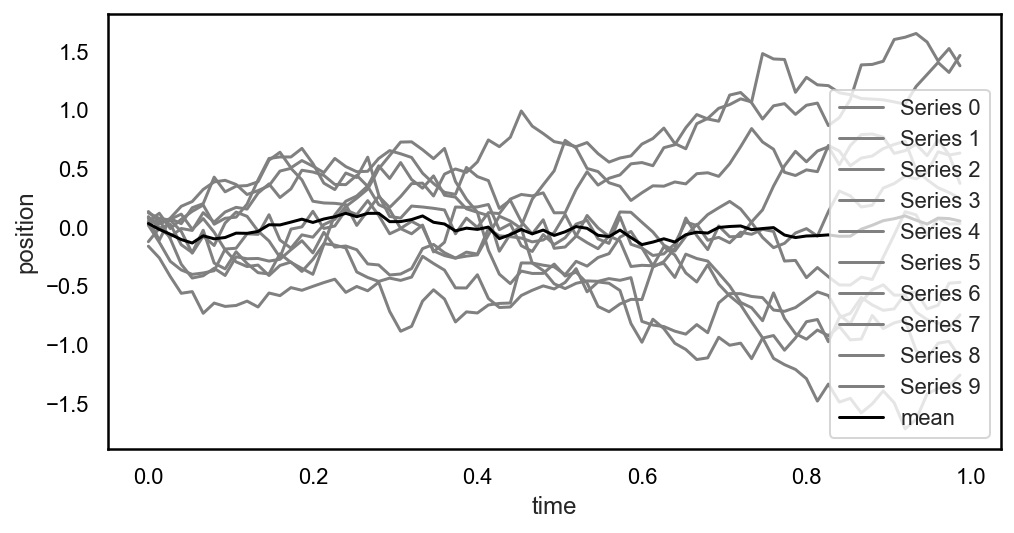

In [398]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], label=f"Series {i}", color='.5')

ax.plot(X, Y.mean(axis=0), label="mean", color="black")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

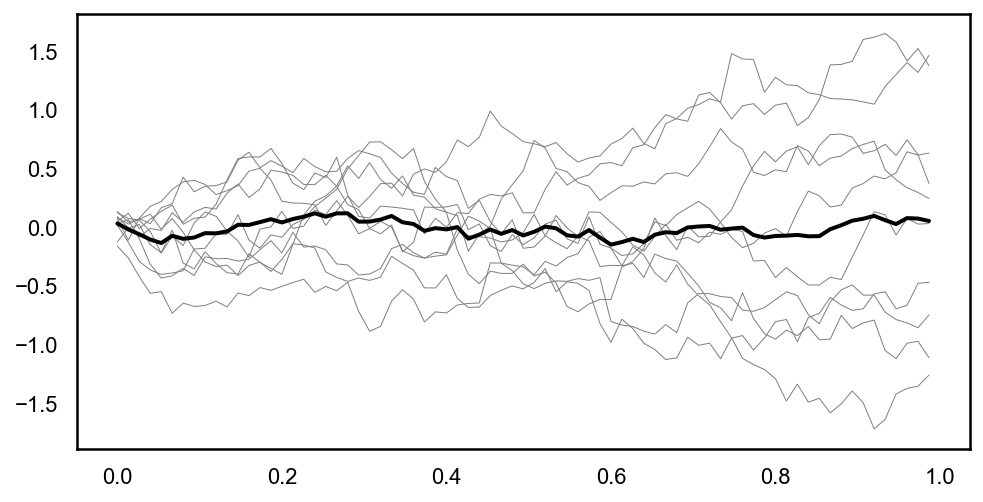

In [399]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], c='.5', lw=.5, zorder=-10)

ax.plot(X, Y.mean(axis=0), c="black", lw=2)

plt.show()

What happens if I need to see individual paths?

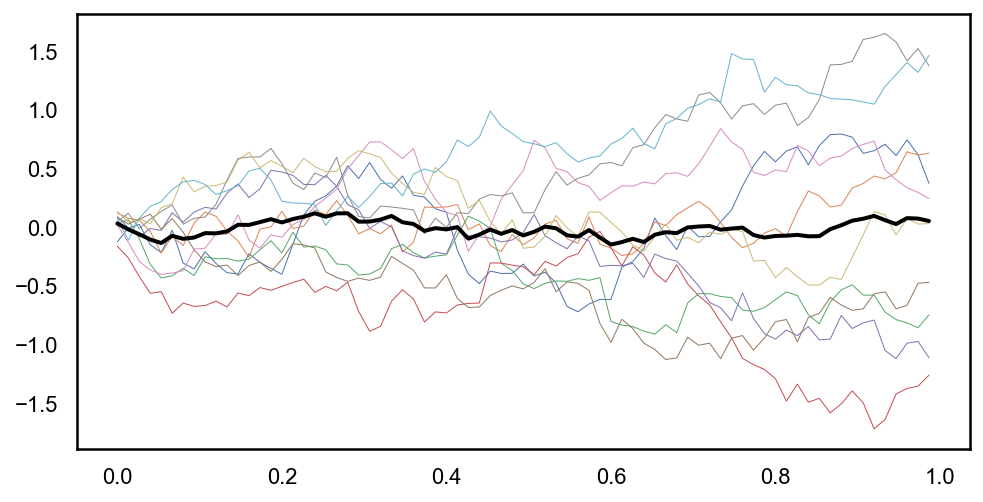

In [400]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], lw=.5, zorder=-10)

ax.plot(X, Y.mean(axis=0), c="black", lw=2)

plt.show()

## Pay attention to colors

<div class="alert alert-block alert-info">

**Color** has potentially a huge impact on what you can see, for instance the **depth**. 
</div>

### Colormap examples

#### Example: Signal properties

Example adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>), itself adapted from <a href="https://ieeexplore.ieee.org/document/4118486">Borland and Taylor (2007)</a>.

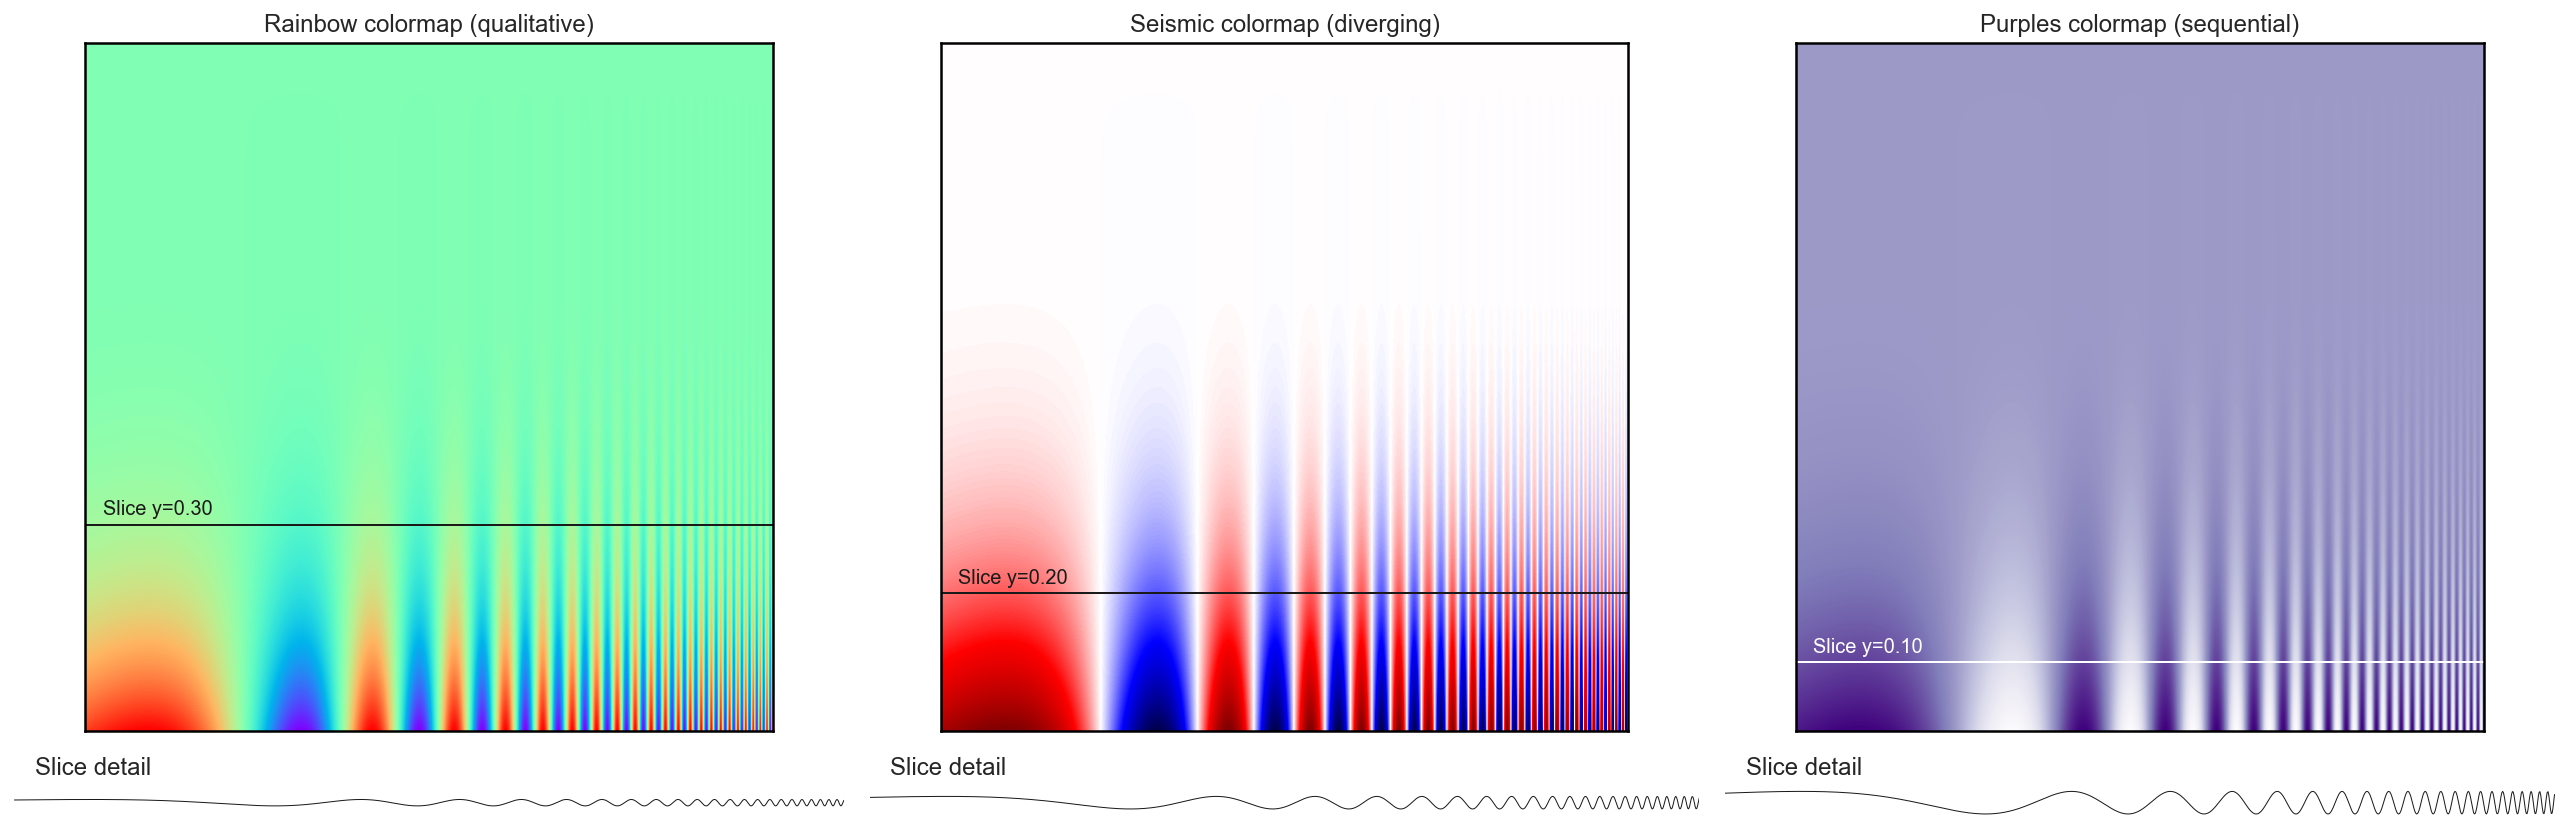

In [441]:
def make(ax1, ax2, cmap, title, y, color='k'):

    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_xticks([])
    ax1.set_yticks([0,0.5,1])
    ax1.get_yaxis().tick_left()

    ax1.axhline(y, lw=1, c=color, xmin=0, xmax=1 )
    ax1.text(.025, y+0.015, "Slice y=%.2f" % y, fontsize=10, color=color)
    ax1.imshow(Z, cmap=cmap, origin='upper', extent=[0,1,0,1])
    ax1.set_xticks([]),ax1.set_yticks([])
    ax1.set_title(title)

    ax2.set_xlim(0,1)
    ax2.set_ylim(-0.1,+1.1)
    ax2.set_xticks([0,.5,1])
    ax2.get_xaxis().tick_bottom()
    ax2.set_yticks([0,1])
    ax2.get_yaxis().tick_left()
    ax2.plot(T/np.pi,Z[int(1024*(1-y))],c='k',lw=.5)
    ax2.axis("off")
    ax2.text(.025, 1.25, "Slice detail")



fg = 0.0,0.0,0.0
bg = 1.0,1.0,1.0
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rc('axes', facecolor = bg)
matplotlib.rc('axes', edgecolor = fg)
matplotlib.rc('xtick', color = fg)
matplotlib.rc('ytick', color = fg)
matplotlib.rc('figure', facecolor = bg)
matplotlib.rc('savefig', facecolor = bg)


plt.figure(figsize=(18,6))

G = gridspec.GridSpec(2, 3, width_ratios=[1,1,1], height_ratios=[15,1])

T = np.linspace(0,np.pi,2*512)
X,Y = np.meshgrid(T,T)
Z = np.power(Y/2,5) * np.sin(np.exp(np.pi/2*X))
Z = (Z-Z.min())/(Z.max()-Z.min())


ax1 = plt.subplot(G[0,0], aspect=1)
ax2 = plt.subplot(G[1,0])
make(ax1, ax2, plt.cm.rainbow, "Rainbow colormap (qualitative)", y=.3)

ax1 = plt.subplot(G[0,1], aspect=1)
ax2 = plt.subplot(G[1,1])
make(ax1, ax2, plt.cm.seismic, "Seismic colormap (diverging)", y=.2)

ax1 = plt.subplot(G[0,2], aspect=1)
ax2 = plt.subplot(G[1,2])
make(ax1, ax2, plt.cm.Purples, "Purples colormap (sequential)", .1, 'white')



> This figure represents the same signal, whose frequency increases to the right and intensity increases towards the bottom, using three different colormaps. The rainbow colormap (qualitative) and the seismic colormap (diverging) are equally bad for such a signal because they tend to hide details in the high frequency domain (bottom-right part). Using a sequential colormap such as the purple one, it is easier to see details in the high frequency domain. 

#### Example 2: Elevation, MRI scan, pyramid, and periodic function

Example adapted from this <a href="https://towardsdatascience.com/your-colour-map-is-bad-heres-how-to-fix-it-lessons-learnt-from-the-event-horizon-telescope-b82523f09469">blog post</a> (<a href="">GitHub Repo</a>).

In [326]:
def pyramid(n=513):
    """Create a pyramid function"""
    s = np.linspace(-1.0, 1.0, n)
    x, y = np.meshgrid(s, s)
    z = 1.0 - np.maximum(abs(x), abs(y))
    return x, y, z


def periodic_fn():
    """Create a periodic function with a step function"""
    dx = dy = 0.05
    y, x = np.mgrid[-5: 5 + dy: dy, -5: 10 + dx: dx]
    z = np.sin(x) ** 10 + np.cos(10 + y * x) + np.cos(x) + 0.2 * y + 0.1 * x + \
        np.heaviside(x, 1) * np.heaviside(y, 1)
    z = z - np.mean(z)
    return x, y, z


def load_hill_topography():
    """
    Load hillshading and return elevation
    """

    with np.load('data_lec4/jacksboro_fault_dem.npz') as dem:
        elevation = dem["elevation"]
    return elevation


def load_scan_image():
    """
    Load image of a medical scan
    """
    with gzip.open('data_lec4/s1045.ima.gz') as dfile:
        scan_im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))
    return scan_im 

In [340]:
def plot_examples(color_map, images, arr_3d, figsize, facecolor):
    """Create the figure based on the provided images, continuous colormaps"""
    fig = plt.figure(figsize=figsize, facecolor=facecolor)
    
    n_images = len(images)

    axi = 1
    idx_3d = 0
    n_cols = len(images)
    n_rows = 1

    for im in images:
        
        if isinstance(im, str) and ('3D' in im):
            px, py, pz = arr_3d[idx_3d]
            ax3d = fig.add_subplot(n_rows, n_cols, axi, projection="3d", facecolor=facecolor, elev=10,
                                   azim=-45)
            ax3d.plot_surface(px, py, pz, cmap=color_map, linewidth=0, antialiased=False)
            ax3d = plt.gca()
            ax3d.xaxis.set_ticklabels([])
            ax3d.yaxis.set_ticklabels([])
            ax3d.zaxis.set_ticklabels([])
            idx_3d = 0 if idx_3d == 1 else 1
        else:
            ax = fig.add_subplot(n_rows, n_cols, axi, facecolor=facecolor)
            ax.imshow(im, cmap=color_map, aspect="auto")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_aspect(1)

        axi += 1
    fig.suptitle(color_map, fontsize=24)
    return fig

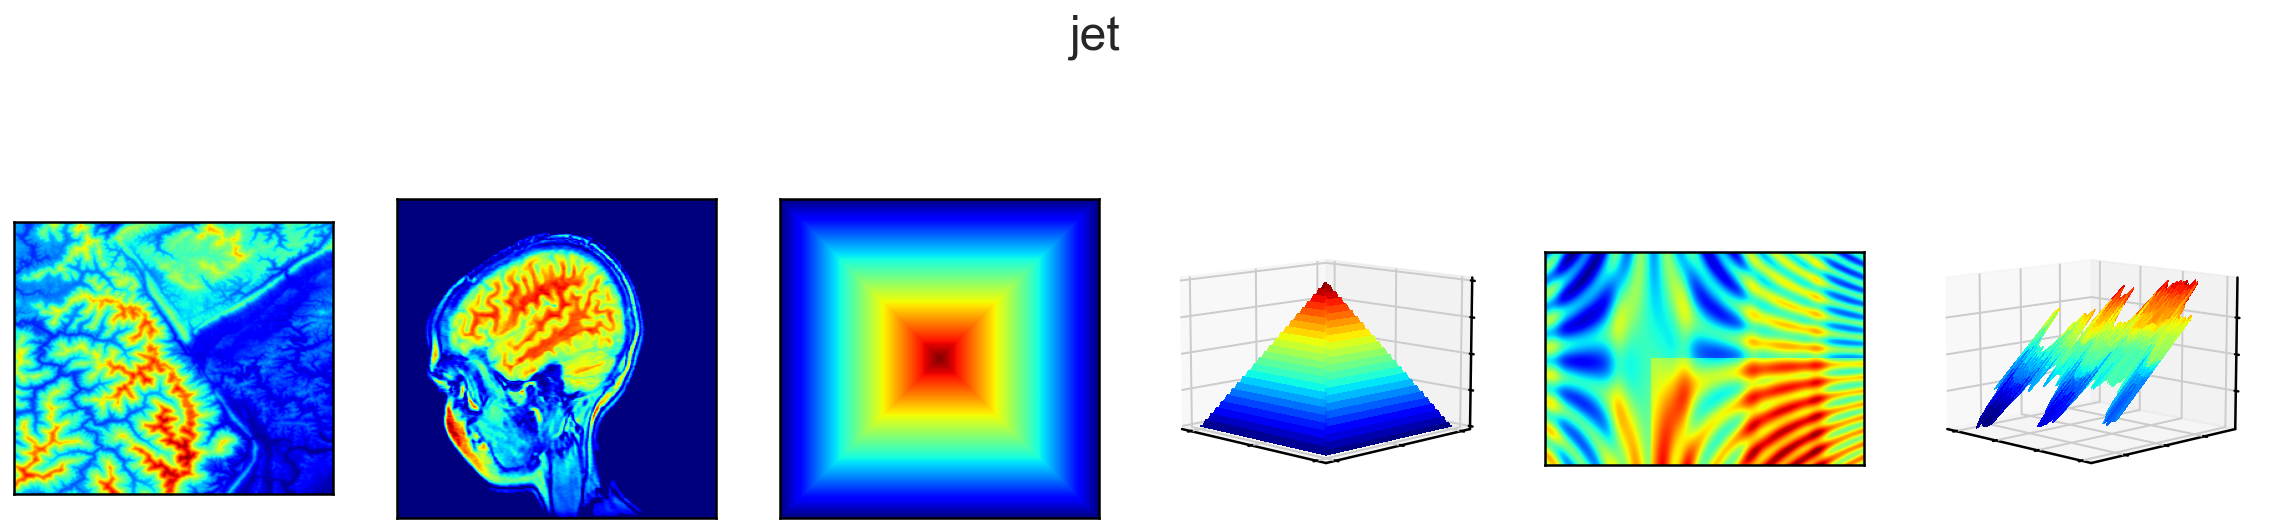

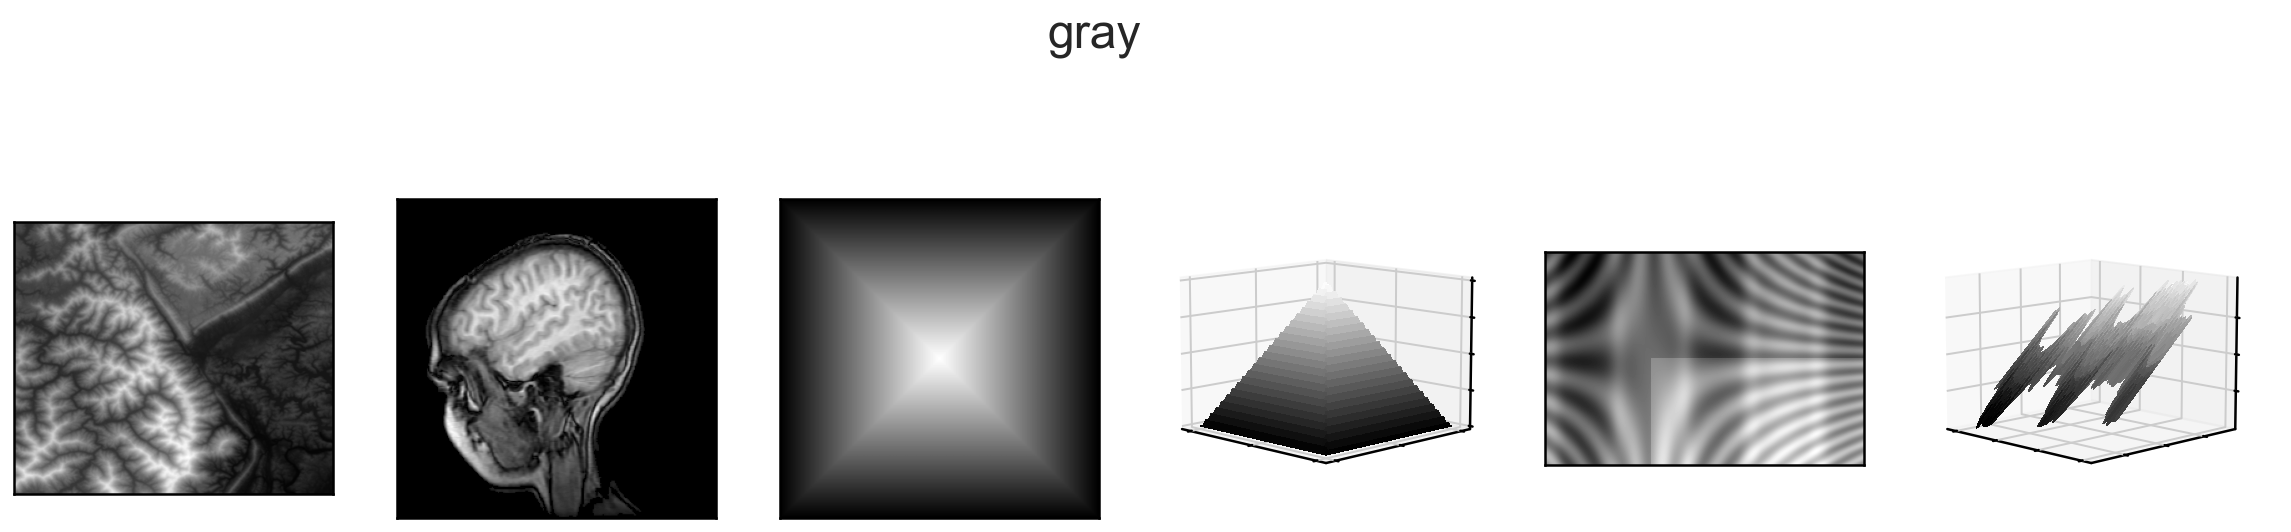

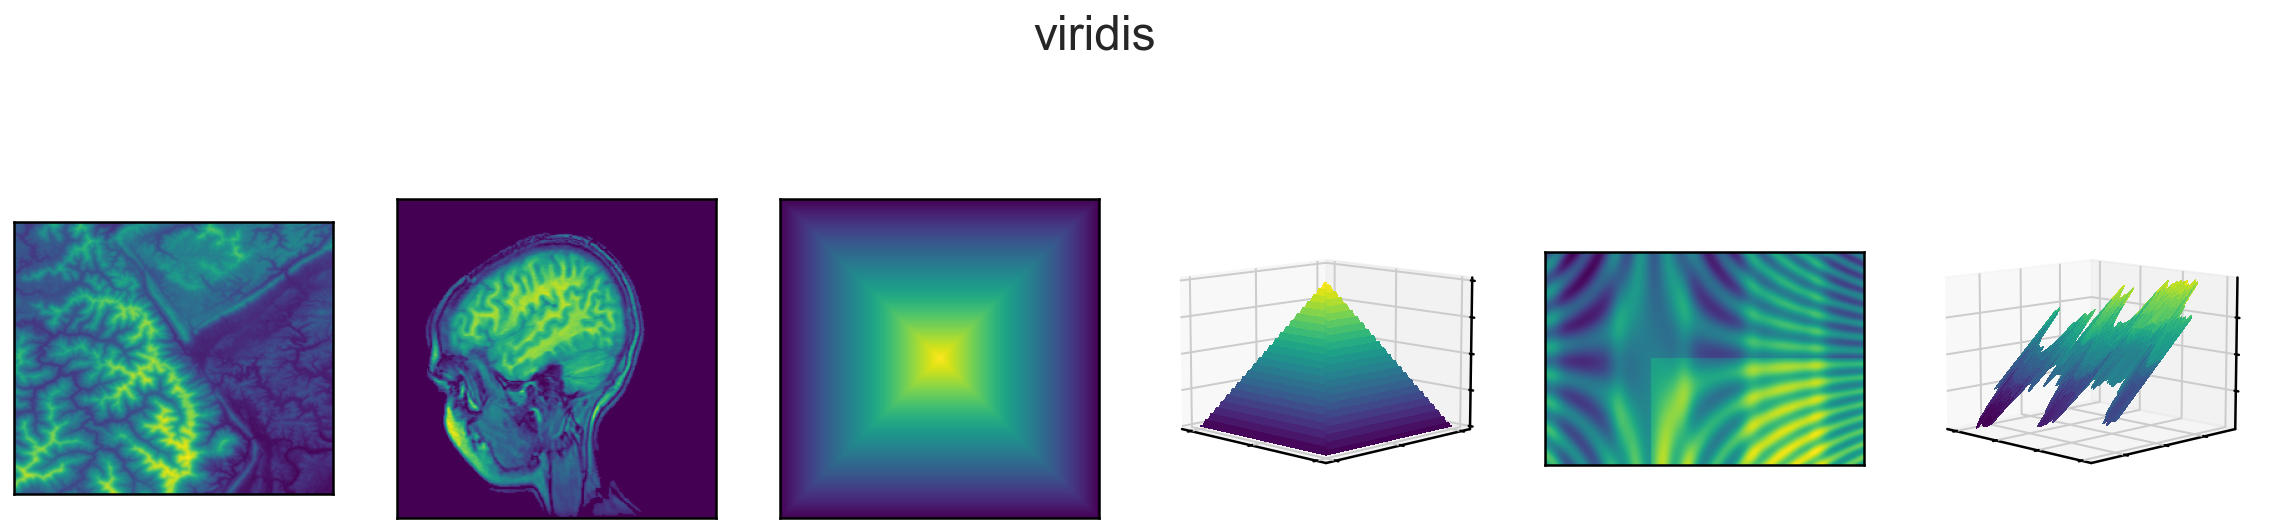

In [341]:
elevation = load_hill_topography()
scan_im = load_scan_image()
xpyr, ypyr, zpyr = pyramid()
per_x, per_z, per_z = periodic_fn()
images = [elevation, scan_im, zpyr, "3D", per_z, "3D"]
facecolor="white"
figsize=(20, 5)

for color_map in ("jet", "gray", "viridis",):
    fig = plot_examples(color_map=color_map,
                         images=images,
                         arr_3d=[(xpyr, ypyr, zpyr), (per_x, per_z, per_z)],
                         figsize=figsize,
                         facecolor=facecolor)

Note that, even familiar, the `jet` colormap is not perceptually uniform, and should be avoided in the context depicted here. The `gray` colormap doesn't have this problem, but some details are more easily "hidden". The `viridis` colormap does a better job here.

## Redundancy is good!

<div class="alert alert-block alert-info">

Don't hesitate to give **several perspectives** on the same data. 
</div>

### Basic example: Histogram vs barplot

#### Generate data <a class="tocSkip"></a>

In [247]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
mean_1 = 150.0
mean_2 = 200.0

sigma_1 = 10.0
sigma_2 = 50.0

n = 100

In [249]:
# Create the samples
x1 = np.random.normal(mean_1, scale=sigma_1, size=n)
x2 = np.random.normal(mean_2, scale=sigma_2, size=n)
df = pd.DataFrame({"x1": x1, "x2": x2})
df

x1          x2
0   145.273372  259.725813
1   150.962679  175.063964
2   162.292134  195.963019
3   165.998775  296.893570
4   146.005857  230.441861
..         ...         ...
95  150.124600  197.350895
96  147.243554  195.110524
97  156.325145  250.307499
98  158.843878  222.716143
99  162.823674  179.276312

[100 rows x 2 columns]

#### Visualize data <a class="tocSkip"></a>

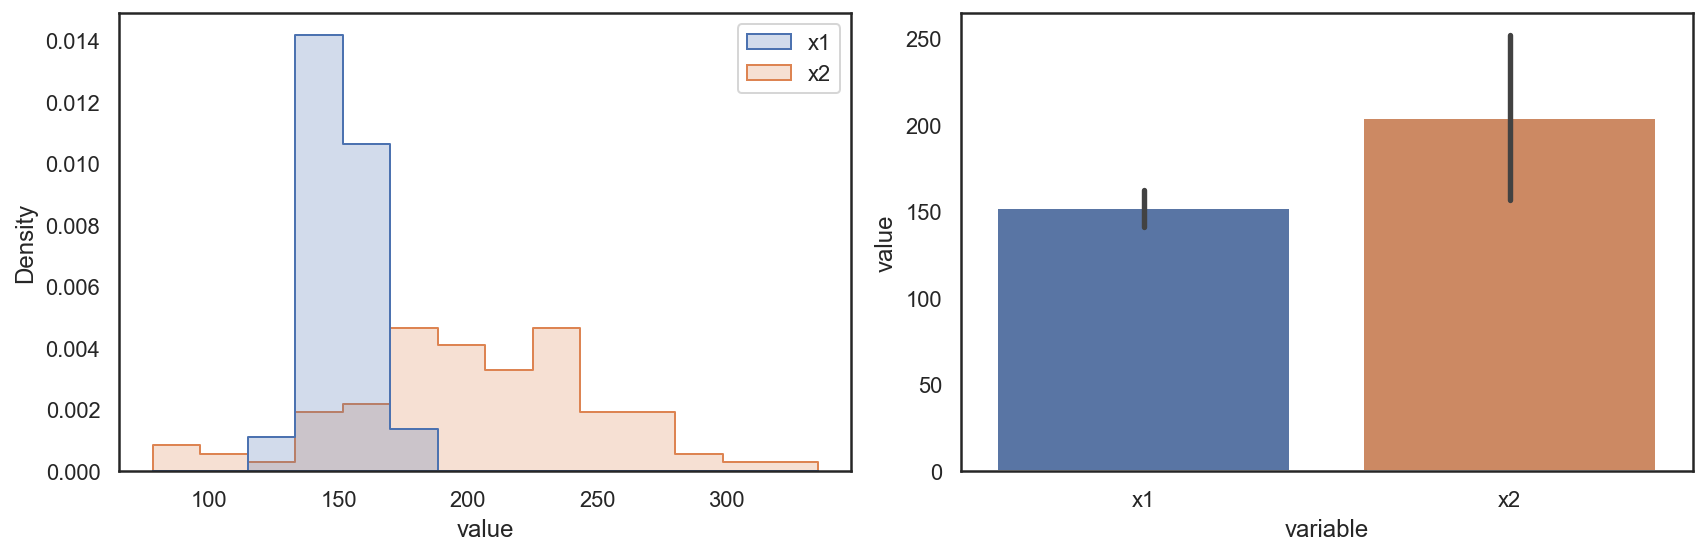

In [254]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# Create histogram
ax = axes[0]
sns.histplot(data=df, ax=ax, element="step", stat="density")
ax.set_xlabel("value")

# Create a barplot
ax = axes[1]
df_melted = df.melt()
sns.barplot(x="variable", y="value", ax=ax, data=df_melted, ci="sd")

plt.tight_layout()
plt.show()

### Penguins: Distribution joint plot

Examples adapted from the [Seaborn's documentation](https://seaborn.pydata.org/tutorial/distributions.html).

In [436]:
penguins = sns.load_dataset("penguins")

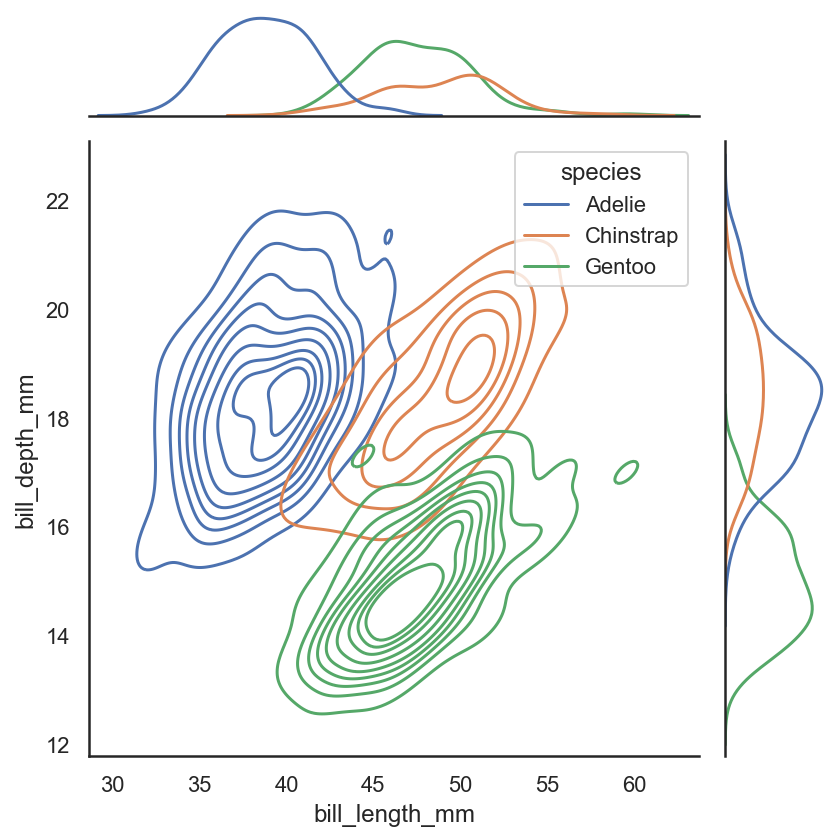

In [440]:
sns.set_theme(context="notebook", style="white")
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde");

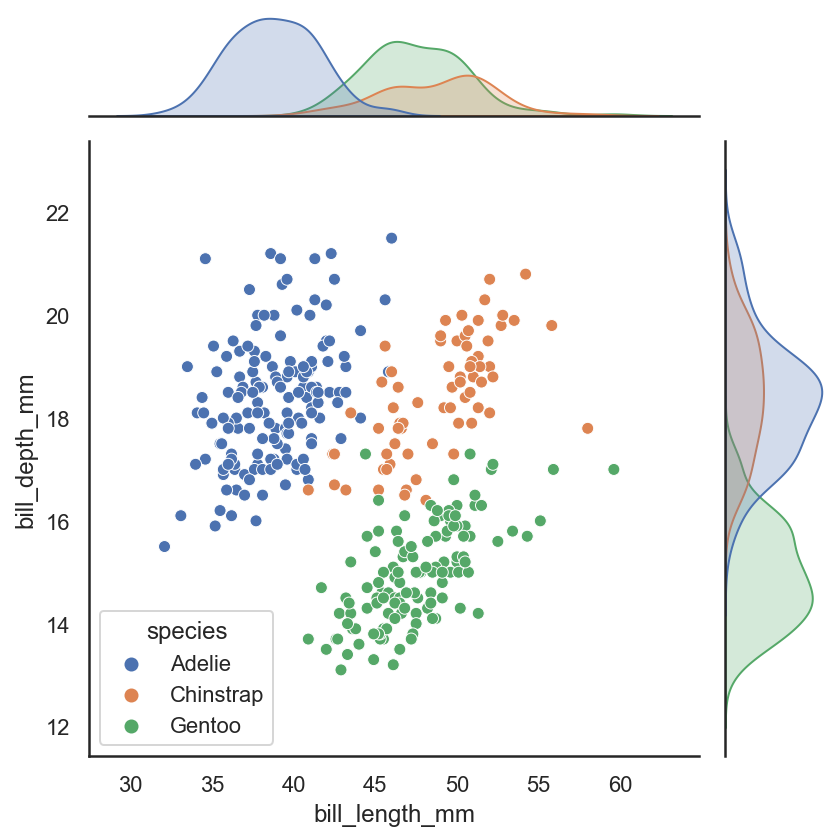

In [439]:
sns.set_theme(context="notebook", style="white")
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="scatter");

### Self-teaching application study

Data and figure coming from <a href="https://dl.acm.org/doi/10.1145/3397481.3450696">Nioche et al. (2021)</a>.

In [263]:
df = pd.read_csv("data_lec4/data_summary.csv", index_col=0)
df

user     domain teacher_md  is_item_specific  \
32     firefly@active.fi  active.fi    forward              True   
48        mole@active.fi  active.fi  threshold              True   
33        fish@active.fi  active.fi  threshold              True   
34         fox@active.fi  active.fi    forward              True   
36        goat@active.fi  active.fi    forward              True   
..                   ...        ...        ...               ...   
0       acacia@active.fi  active.fi    forward              True   
1      aconite@active.fi  active.fi    forward              True   
2   agapanthus@active.fi  active.fi  threshold              True   
41        kiwi@active.fi  active.fi  threshold              True   
53     seabass@active.fi  active.fi  threshold              True   

    begin_with_active           first_ss_av_time            last_ss_av_time  \
32               True  2020-09-30 16:00:00+03:00  2020-10-06 16:06:40+03:00   
48               True  2020-09-30 18:00:00+03:00  2020-10-06 18:06:40+03:00   
33              False  2020-09-30 20:00:00+03:00  2020-10-06 20:06:40+03:00   
34               True  2020-09-30 21:00:00+03:00  2020-10-06 21:06:40+03:00   
36              False  2020-09-30 21:00:00+03:00  2020-10-06 21:06:40+03:00   
..                ...                        ...                        ...   
0                True  2020-10-01 10:00:00+03:00  2020-10-07 10:06:40+03:00   
1               False  2020-10-01 17:00:00+03:00  2020-10-07 17:06:40+03:00   
2               False  2020-10-01 20:00:00+03:00  2020-10-07 20:06:40+03:00   
41               True  2020-09-30 09:30:00+03:00  2020-10-06 09:36:40+03:00   
53              False  2020-09-30 08:30:00+03:00  2020-10-06 08:36:40+03:00   

    n_ss_done  n_eval_leitner  n_recall_leitner  n_eval_act  n_recall_act  
32         14            63.0              54.0        40.0          33.0  
48         14            46.0              32.0        75.0          33.0  
33         14            62.0              55.0       126.0         109.0  
34         14            56.0              48.0        66.0          47.0  
36         14            57.0              48.0        28.0          19.0  
..        ...             ...               ...         ...           ...  
0           6             NaN               NaN         NaN           NaN  
1           4             NaN               NaN         NaN           NaN  
2           4             NaN               NaN         NaN           NaN  
41          2             NaN               NaN         NaN           NaN  
53          1             NaN               NaN         NaN           NaN  

[65 rows x 12 columns]

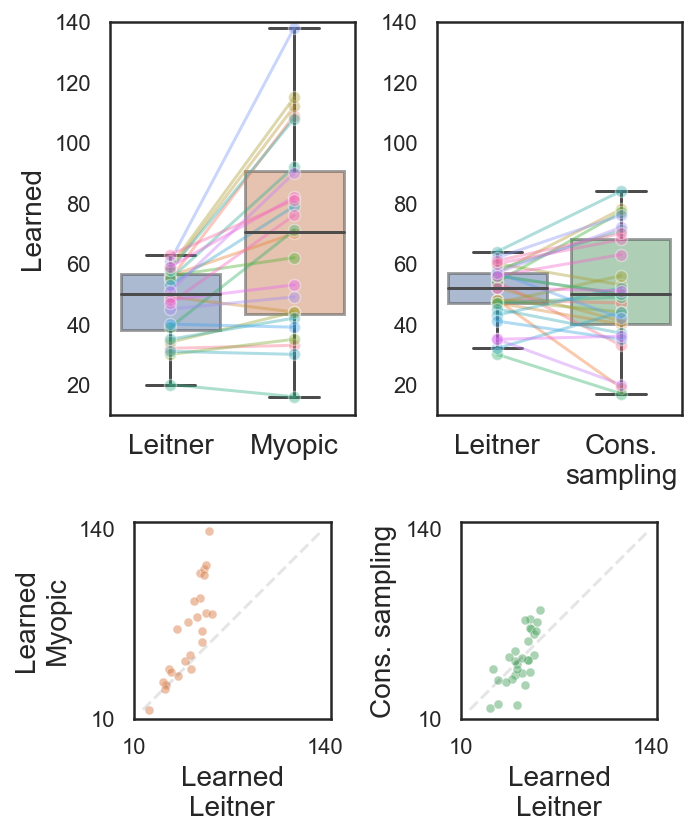

In [261]:
def roundup(x, base=1.):
    return int(math.ceil(x / base)) * base


def rounddown(x, base=1.):
    return int(math.floor(x / base)) * base


def scatter_n_learnt(data, active, ax, x_label, y_label, fontsize_label):

    min_leitner = np.min(data.n_recall_leitner)
    min_act = np.min(data.n_recall_act)
    min_v = np.min((min_leitner, min_act))

    max_leitner = np.max(data.n_recall_leitner)
    max_act = np.max(data.n_recall_act)
    max_v = np.max((max_leitner, max_act))

    data = data[data.teacher_md == active]

    color = "C1" if active == "threshold" else "C2"

    sns.scatterplot(data=data,
                    x="n_recall_leitner",
                    y="n_recall_act",
                    color=color,
                    alpha=0.5, s=20,
                    ax=ax)
    
    ax.set_xlabel(x_label, fontsize=fontsize_label)
    ax.set_ylabel(y_label, fontsize=fontsize_label)

    ax.plot((min_v, max_v), (min_v, max_v), ls="--", color="black",
            alpha=0.1)

    ax.set_xticks((rounddown(min_v, base=10), roundup(max_v, base=10)))
    ax.set_yticks((rounddown(min_v, base=10), roundup(max_v, base=10)))

    ax.set_aspect(1)


def boxplot(df, ylabel, axes, ylim, fontsize_label):

    color_dic = {"leitner": "C0", "threshold": "C1", "forward": "C2"}
    teacher_names = {"forward": "Cons.\nsampling",
                     "leitner": "Leitner",
                     "threshold": "Myopic"}

    for i, teacher in enumerate(('threshold', 'forward')):
        slc = df.teacher_md == teacher
        df_slc = df[slc]
        user = df_slc["user"]
        x = df_slc["n_recall_leitner"]
        y = df_slc["n_recall_act"]
            
        df_plot = pd.DataFrame({"user": user, "leitner": x, teacher: y})

        df_melt = df_plot.melt(id_vars=["user"],
                               value_vars=["leitner", teacher],
                               value_name=ylabel, var_name="teacher")

        ax = axes[i]

        order = ["leitner", teacher]
        colors = [color_dic[o] for o in order]
        ticklabels = [teacher_names[o] for o in order]

        sns.boxplot(data=df_melt, x="teacher", y=ylabel, ax=ax,
                    showfliers=False, order=order, palette=colors,
                    boxprops=dict(alpha=.5))
        sns.lineplot(data=df_melt,
                     x="teacher", y=ylabel, hue="user", alpha=0.4,
                     ax=ax, legend=False, marker="o")

        ax.set_xticklabels(ticklabels, fontsize=fontsize_label)
        ax.set_xlabel("")
        ax.set_ylabel(ylabel, fontsize=fontsize_label)

        ax.set_ylim(ylim)
        ax.set_xlabel("")

    axes[-1].set_ylabel("")

# Select only the user that complete the task
df = df[df.n_ss_done == 14]

min_leitner = np.min(df.n_recall_leitner)
min_act = np.min(df.n_recall_act)
min_v = np.min((min_leitner, min_act))

max_leitner = np.max(df.n_recall_leitner)
max_act = np.max(df.n_recall_act)
max_v = np.max((max_leitner, max_act))

fig_folder = os.path.join("fig")
os.makedirs(fig_folder, exist_ok=True)

# Parameters plot
fontsize_title = 18
fontsize_subtitle = 18
fontsize_label_boxplot = 14
fontsize_letter = 20
fontsize_label_scatter = 14
figsize = (5, 6)

fig = plt.figure(figsize=figsize)

# Create axes
gs = gridspec.GridSpec(2, 2, height_ratios=[0.6, 0.3])
axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in  range(2)]

boxplot(df=df, axes=(axes[0], axes[1]),
        ylabel="Learned",
        ylim=(rounddown(min_v, base=10), roundup(max_v, base=10)),
        fontsize_label=fontsize_label_boxplot)

scatter_n_learnt(data=df,
                 active="threshold",
                 x_label="Learned\nLeitner",
                 y_label="Learned\nMyopic",
                 ax=axes[2],
                 fontsize_label=fontsize_label_scatter)

scatter_n_learnt(data=df,
                 active="forward",
                 x_label="Learned\nLeitner",
                 y_label="Cons. sampling",
                 ax=axes[3],
                 fontsize_label=fontsize_label_scatter)

plt.tight_layout() 

## Don't forget that text can help

<div class="alert alert-block alert-info">

**Text** can **support the visualization**.
</div>

### Example: Trigonometric functions

Example adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>)

In [ ]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

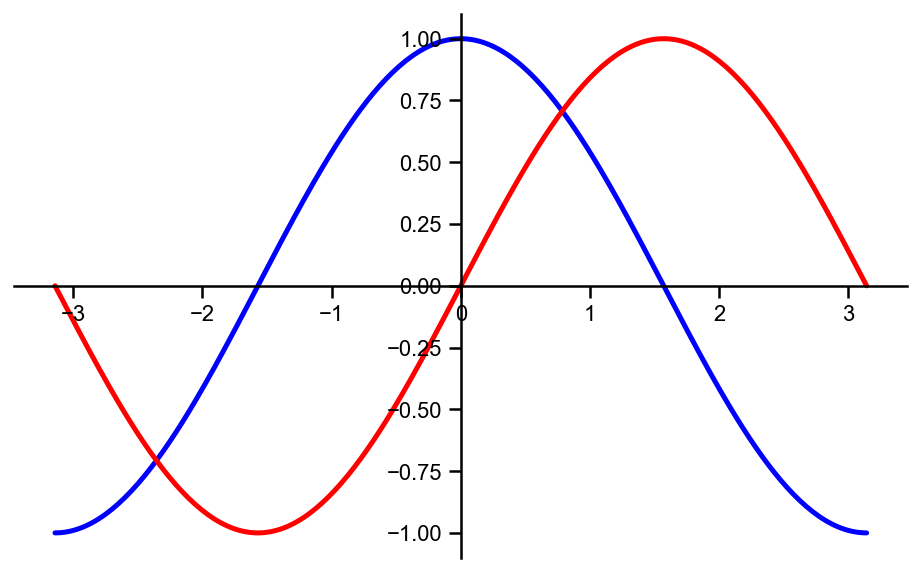

In [419]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine", zorder=-1)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine", zorder=-1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

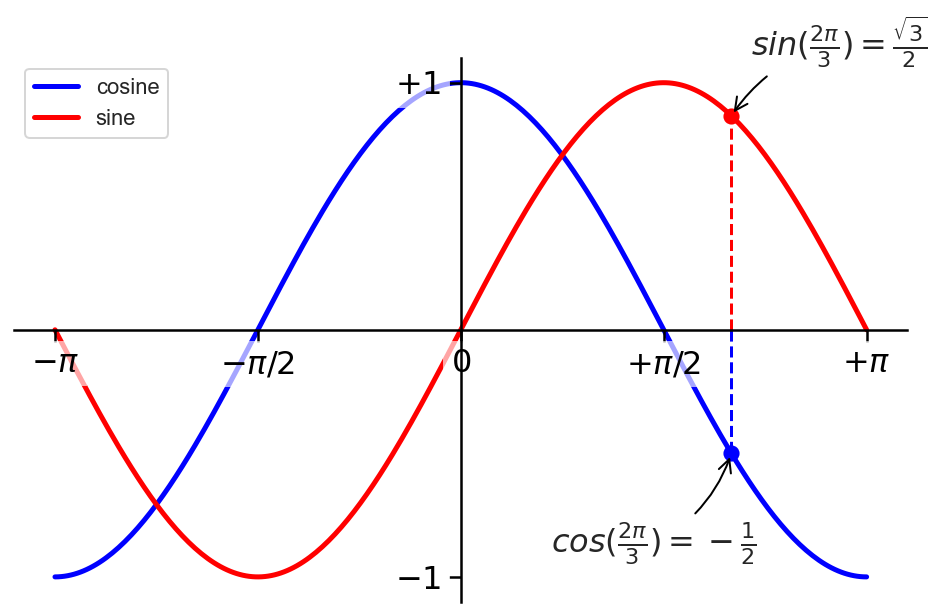

In [415]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine", zorder=-1)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine", zorder=-1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left')

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, +1])
ax.set_yticklabels([r'$-1$', r'$+1$'])

t = 2*np.pi/3
ax.plot([t,t],[0,np.cos(t)],
     color ='blue',  linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.cos(t),], 50, color ='blue')
ax.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', xy=(t, np.sin(t)),  xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="black"))

ax.plot([t,t],[0,np.sin(t)],
          color ='red',  linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.sin(t),], 50, color ='red')
ax.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),  xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="black"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65, zorder=1))

# Recommended reading <a class="tocSkip"></a>

<a href="https://dl.acm.org/doi/pdf/10.1145/1743546.1743567">Heer et al. (2010)</a>

<a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a>

# Dataset <a class="tocSkip"></a>

<a href="https://data.world/">data.world</a> has a nice API. Price to pay is that you need to login.

In [99]:
import datadotworld as dw
results = dw.query(
	'chhs/ca-living-wage', 
    'SELECT * FROM living_wage')
results_df = results.dataframe

In [100]:
results_df

ind_id                                     ind_definition  reportyear  \
0         770  Living wage and percent of families with incom...        2010   
1         770  Living wage and percent of families with incom...        2010   
2         770  Living wage and percent of families with incom...        2010   
3         770  Living wage and percent of families with incom...        2010   
4         770  Living wage and percent of families with incom...        2010   
...       ...                                                ...         ...   
15864     770  Living wage and percent of families with incom...        2010   
15865     770  Living wage and percent of families with incom...        2010   
15866     770  Living wage and percent of families with incom...        2010   
15867     770  Living wage and percent of families with incom...        2010   
15868     770  Living wage and percent of families with incom...        2010   

       race_eth_code race_eth_name geotype  geotypevalue            geoname  \
0                1.0          AIAN      CA             6         California   
1                2.0         Asian      CA             6         California   
2                3.0     AfricanAm      CA             6         California   
3                4.0        Latino      CA             6         California   
4                5.0         NHOPI      CA             6         California   
...              ...           ...     ...           ...                ...   
15864            NaN          None      PL         87056  Yucca Valley town   
15865            NaN          None      PL         87056  Yucca Valley town   
15866            NaN          None      PL         87056  Yucca Valley town   
15867            NaN          None      PL         87056  Yucca Valley town   
15868            NaN          None      PL         87090        Zayante CDP   

          county_name  county_fips  ...   families  pct_lt_lw ll_95ci  \
0                None          NaN  ...     9509.0       26.6      NA   
1                None          NaN  ...   452847.0       18.0      NA   
2                None          NaN  ...   100319.0       20.3      NA   
3                None          NaN  ...  1156849.0       42.4      NA   
4                None          NaN  ...    10732.0       20.0      NA   
...               ...          ...  ...        ...        ...     ...   
15864  San Bernardino       6071.0  ...        NaN        NaN      NA   
15865  San Bernardino       6071.0  ...        NaN        NaN      NA   
15866  San Bernardino       6071.0  ...        NaN        NaN      NA   
15867  San Bernardino       6071.0  ...        NaN        NaN      NA   
15868      Santa Cruz       6087.0  ...        NaN        NaN      NA   

       ul_95ci  se  rse family_type_decile ca_rr livingwage    version  
0           NA  NA   NA               None  1.06      22.15 2013-09-29  
1           NA  NA   NA               None  0.72      22.15 2013-09-29  
2           NA  NA   NA               None  0.81      22.15 2013-09-29  
3           NA  NA   NA               None  1.70      22.15 2013-09-29  
4           NA  NA   NA               None  0.80      22.15 2013-09-29  
...        ...  ..  ...                ...   ...        ...        ...  
15864       NA  NA   NA               None   NaN      20.67 2013-09-29  
15865       NA  NA   NA               None   NaN      25.43 2013-09-29  
15866       NA  NA   NA               None   NaN      24.85 2013-09-29  
15867       NA  NA   NA               None   NaN      20.67 2013-09-29  
15868       NA  NA   NA               None   NaN        NaN 2013-09-29  

[15869 rows x 24 columns]

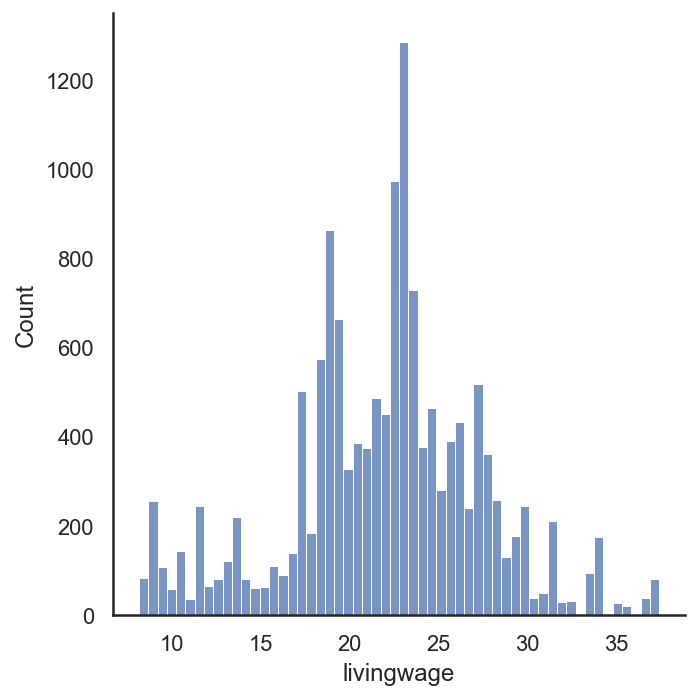

In [101]:
sns.displot(results_df.livingwage)

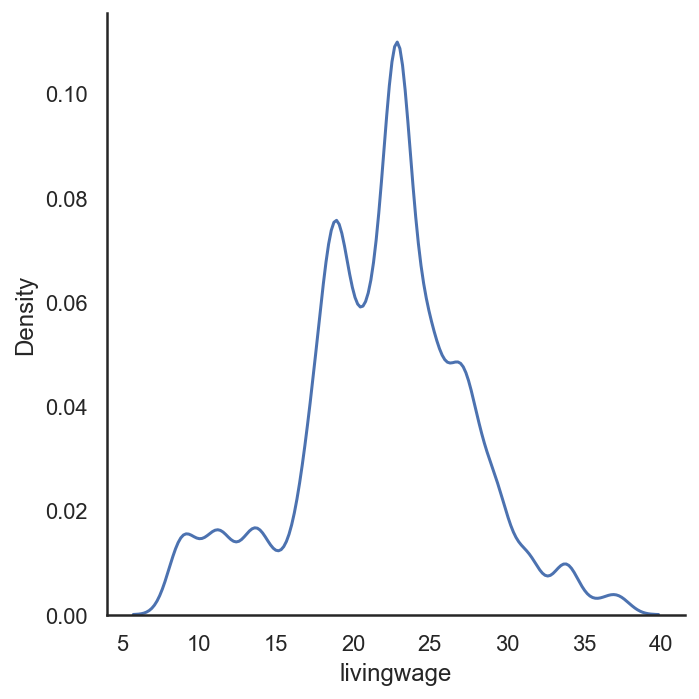

In [104]:
sns.displot(results_df.livingwage, kind="kde")

<AxesSubplot:xlabel='livingwage'>

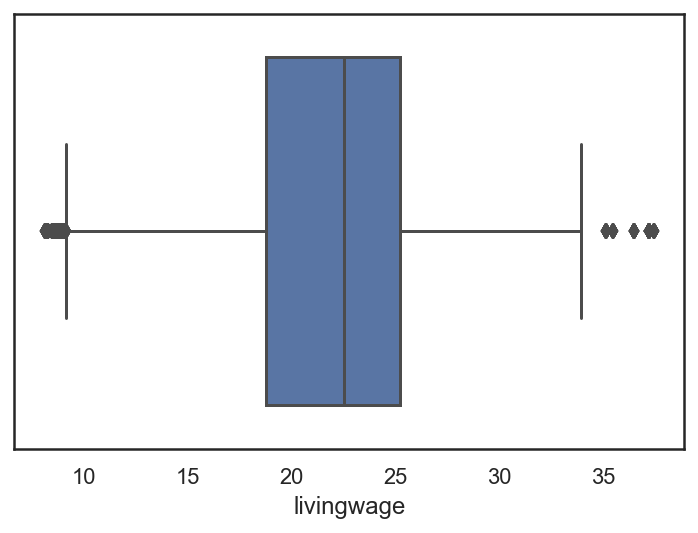

In [103]:
sns.boxplot(data=results_df, x="livingwage")